In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.table import Table

import pandas
pandas.set_option('display.max_columns', None)

%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use(['labstyle.mplstyle']) 

# Functions

In [2]:
def Plot(x_data, y_data, x_label='', y_label='', data_mask=None, 
         xlog=True, ylog=True, x_min=None, x_max=None, y_min=None, y_max=None, hist2d_nbins=200, 
         x_min_bins=None, x_max_bins=None, xbins=40):
    
    if x_min==None: x_min = np.min(x_data)
    if x_max==None: x_max = np.max(x_data)
    if y_min==None: y_min = np.min(y_data)
    if y_max==None: y_max = np.max(y_data)
    
    
    # Define the figure
    fig, ax = plt.subplots(1, figsize=(10,9))
    ax.set_box_aspect(1)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    if xlog==True: ax.set_xscale('log')
    if ylog==True: ax.set_yscale('log')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    
    # Plot the 2d-histogram
    binx = np.logspace(start=np.log10(x_min), stop=np.log10(x_max), num=hist2d_nbins)
    biny = np.logspace(start=np.log10(y_min), stop=np.log10(y_max), num=hist2d_nbins)
    hist = ax.hist2d(x_data, y_data, bins=(binx, biny), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.coolwarm, alpha=0.5)
    cax = fig.add_axes([0.87, 0.11, 0.02, 0.77])
    fig.colorbar(hist[3], cax=cax, label='$N_{\\rm points}/{\\rm bin}$')
    
    
    # Plot the statistics
    if data_mask is not None:
        x_data = x_data[data_mask]
        y_data = y_data[data_mask]
    
    if x_min_bins==None: x_min_bins = x_min
    if x_max_bins==None: x_max_bins = x_max
    
    bin_edges = np.logspace(start=np.log10(x_min_bins), stop=np.log10(x_max_bins), num=xbins+1)
    statistics = np.zeros(shape=(int(xbins), 5))
    
    for i in range(int(xbins)):
        mask_bin = ((x_data>=bin_edges[i]) & (x_data<bin_edges[i+1]))
        x_temp = np.array(x_data[mask_bin])
        y_temp = np.array(y_data[mask_bin])
        N_temp = int(len(x_temp))
        statistics[i] = np.array([N_temp, 
                                  np.median(x_temp), 
                                  np.median(y_temp), 
                                  np.quantile(y_temp, 0.25),
                                  np.quantile(y_temp, 0.75)])

    ax.plot(statistics[:,1], statistics[:,2], color='black')
    ax.plot(statistics[:,1], statistics[:,3], color='black', alpha=0.5)
    ax.plot(statistics[:,1], statistics[:,4], color='black', alpha=0.5)
    ax.fill_between(statistics[:,1], statistics[:,3], statistics[:,4], color='gray', alpha=0.15)
     
    return fig, ax, statistics, hist

# Analyze the input data

In [3]:
data = Table.read('SDSS_LAB2024_photometry.fits', format='fits')
data = data.to_pandas()
data

id          ra        dec  redshift   sdss.up  \
0      1237657873254907919  140.153626  39.308208  0.028312  0.119670   
1      1237657873254973544  140.325684  39.456471  0.056195  0.091612   
2      1237654880726286453  190.287293   5.309674  0.074970  0.045000   
3      1237654880727728243  193.587524   5.282654  0.048760  0.466016   
4      1237654880728842356  196.179871   5.124015  0.054671  0.147323   
...                    ...         ...        ...       ...       ...   
92478  1237654881812545849  219.128952   5.382636  0.029722  0.130263   
92479  1237654881814511891  223.538071   5.049211  0.028227  0.050782   
92480  1237651823782396044  214.389114   5.217847  0.079587  0.126914   
92481  1237651823782985830  215.724396   5.183447  0.056425  0.101443   
92482  1237651823783313552  216.423401   5.139604  0.056476  0.174653   

       sdss.up_err   sdss.gp  sdss.gp_err   sdss.rp  sdss.rp_err   sdss.ip  \
0         0.020435  1.029917     0.012816  1.621148     0.022931  1.954847   
1         0.006626  0.247744     0.003121  0.358206     0.004741  0.453588   
2         0.004752  0.214703     0.004054  0.462379     0.007594  0.667785   
3         0.013479  1.720028     0.006990  2.967451     0.009481  4.098367   
4         0.008597  0.379945     0.003792  0.529207     0.006502  0.663836   
...            ...       ...          ...       ...          ...       ...   
92478     0.007935  0.621287     0.008810  1.230597     0.015837  1.698397   
92479     0.006481  0.183128     0.002653  0.343451     0.003437  0.469283   
92480     0.013361  0.634937     0.021585  1.301933     0.033164  1.929476   
92481     0.014067  0.449638     0.008164  0.778556     0.010234  0.989564   
92482     0.011279  0.502357     0.004601  0.706167     0.007153  0.893324   

       sdss.ip_err   sdss.zp  sdss.zp_err  
0         0.023217  2.286192     0.059580  
1         0.007278  0.492240     0.025029  
2         0.011125  0.835854     0.022765  
3         0.018062  4.911618     0.059197  
4         0.009359  0.737546     0.032889  
...            ...       ...          ...  
92478     0.020601  2.189831     0.033350  
92479     0.005994  0.610483     0.021694  
92480     0.038042  2.559679     0.063614  
92481     0.016335  1.230477     0.053690  
92482     0.011788  0.901858     0.044990  

[92483 rows x 14 columns]

# Analyze the output data

In [4]:
results = Table.read('SDSS_LAB2024_PROFresults.fits', format='fits')
results = results.to_pandas()
results

id  bayes.attenuation.E_BVs.stellar.young  \
0      1237657873254907919                               0.246312   
1      1237657873254973544                               0.242590   
2      1237654880726286453                               0.346988   
3      1237654880727728243                               0.474818   
4      1237654880728842356                               0.211907   
...                    ...                                    ...   
92478  1237654881812545849                               0.272723   
92479  1237654881814511891                               0.488468   
92480  1237651823782396044                               0.565932   
92481  1237651823782985830                               0.440558   
92482  1237651823783313552                               0.278352   

       bayes.attenuation.E_BVs.stellar.young_err  bayes.sfh.age  \
0                                       0.195925    1999.112517   
1                                       0.147526    4242.216616   
2                                       0.297202    6976.770465   
3                                       0.201624    5047.546834   
4                                       0.144577    4419.007508   
...                                          ...            ...   
92478                                   0.281131    6736.958100   
92479                                   0.209025    6801.796013   
92480                                   0.305752    6284.029560   
92481                                   0.210422    4605.810265   
92482                                   0.133874    2950.698962   

       bayes.sfh.age_err  bayes.sfh.tau_main  bayes.sfh.tau_main_err  \
0             960.516317          373.966355              291.577328   
1            2997.810626         8458.942235             3979.155808   
2            3166.220618         3606.148039             3770.936761   
3            3276.271915         7061.268577             4311.671873   
4            3045.148866         8707.645599             3888.994758   
...                  ...                 ...                     ...   
92478        3243.666557         2660.198026             3200.988249   
92479        3576.538446         7863.322191             4021.639544   
92480        3363.132455         5575.880060             4385.207483   
92481        3212.107666         6481.523518             4522.875025   
92482        2303.287832         7685.147564             4288.064255   

       bayes.sfh.sfr  bayes.sfh.sfr_err  bayes.stellar.m_star  \
0           0.205591           0.291975          3.947004e+09   
1           1.233340           0.809994          2.975272e+09   
2           1.715091           2.535770          2.219241e+10   
3           9.430058           6.855379          3.366230e+10   
4           1.641377           1.128354          4.053901e+09   
...              ...                ...                   ...   
92478       0.457894           0.825593          8.065328e+09   
92479       0.329043           0.283127          1.630875e+09   
92480      11.752850          11.894083          7.269545e+10   
92481       3.090071           2.421301          1.065491e+10   
92482       2.742367           1.469244          4.801953e+09   

       bayes.stellar.m_star_err  bayes.sdss.gp  bayes.sdss.gp_err  \
0                  8.204043e+08       0.834379           0.032023   
1                  1.105974e+09       0.242731           0.006881   
2                  5.856282e+09       0.207946           0.005878   
3                  1.140284e+10       1.640992           0.039125   
4                  1.501812e+09       0.374076           0.010253   
...                         ...            ...                ...   
92478              2.213332e+09       0.586609           0.015397   
92479              4.942055e+08       0.183387           0.005621   
92480              2.145372e+10       0.591039           0.019209   
92481              3.774382e+09       0.422366        

In [5]:
MS_mask = np.load('MS_mask_SupercomputerData.npy')
sSFR_threshold = 5.734e-11

# 1) Study of the sSFR model in the closed-box approximation

$$SFR(t) \, =  \epsilon \, M_{\rm gas}^\alpha (t) \, \overset{\mathrm{{Kennicut}}}{=} \, \dfrac{\epsilon}{\tau_{\rm dyn}} M_{\rm gas}(t) \, \doteq \; \epsilon' \, M_{\rm gas}(t) \: , \: {\rm where} \: \epsilon \approx 0.02 \, , \, \tau_{\rm dyn} = 2 \times 10^7 {\rm yr} \left(\dfrac{R_{1/2}}{4{\rm kpc}}\right)\left(\dfrac{v_{\rm circ}}{200{\rm km \, s^{-1}}}\right)^{-1}$$

$$\dfrac{dM_{\rm gas}(t)}{dt} \, = \, \dot{M}_{\rm gas}^{\rm in}(t) - \dot{M}_{\rm gas}^{\rm out}(t) - (1-R)SFR(t) \, \overset{\color{red}{\mathrm{closed-box \, , \, R=0}}}{=} \, -SFR(t) \, = \, -\epsilon' \, M_{\rm gas}(t) \:\: \overset{\mathrm{if \, \epsilon(t) = \epsilon}}{\Longrightarrow }\:\: \color{lime}{M_{\rm gas}(t) \, = \, M_{\rm gas}(t_0)\exp{[-\epsilon' (t-t_0)]}}$$

$$\color{lime}{SFR(t) \, = \, \epsilon' M_{\rm gas}(t_0)\exp{[-\epsilon' (t-t_0)]}}$$

$$M_{\rm star}(t) \, = \, \int_{t_0}^t SFR(t')dt' \:\: \Longrightarrow \:\: \color{lime}{M_{\rm star}(t) \, = \, M_{\rm gas}(t_0)\{1-\exp{[-\epsilon' (t-t_0)]}\}}$$

$$\color{lime}{sSFR(t) \, = \, \dfrac{SFR(t)}{M_{\rm star}(t)} \, = \, \epsilon'\dfrac{\exp{[-\epsilon' (t-t_0)]}}{1-\exp{[-\epsilon' (t-t_0)]}}}$$

In [6]:
# Define the sSFR from Kennicut
def sSFR (age, epsilon=0.02, tdyn=2e7):
    epsilon_primed = epsilon / tdyn
    return epsilon_primed * np.exp(-epsilon_primed*age) / (1 - np.exp(-epsilon_primed*age))

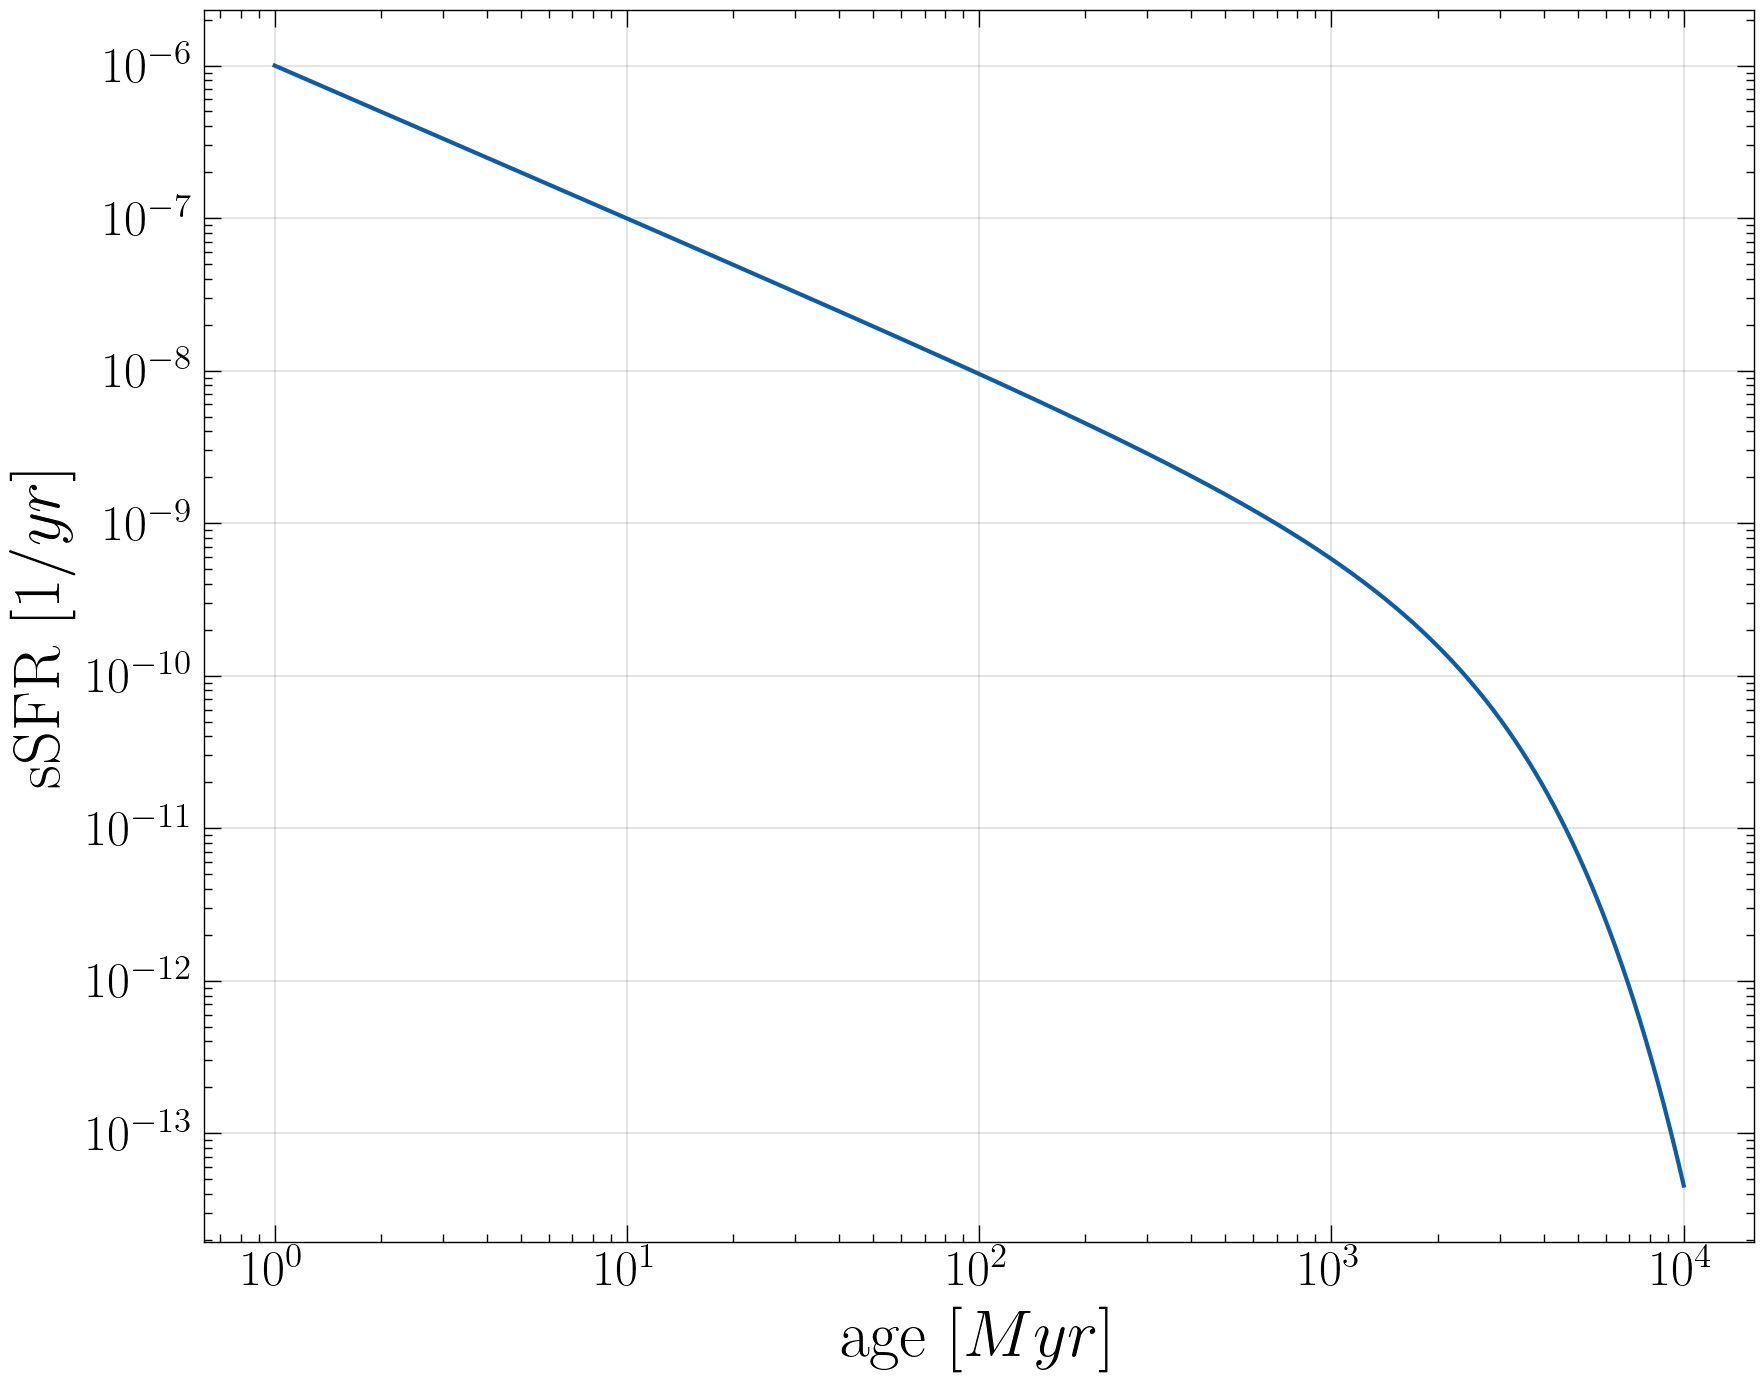

In [7]:
age = np.linspace(10**0, 10**4, 1000) # in Myrs
sSFR_points = sSFR(age*10**6)         # in years
plt.plot(age, sSFR_points)

plt.xlabel("age $[Myr]$")
plt.ylabel("sSFR $[1/yr]$")
plt.xscale('log')
plt.yscale('log')

## 1.1) best.sfh.sfr10Myrs

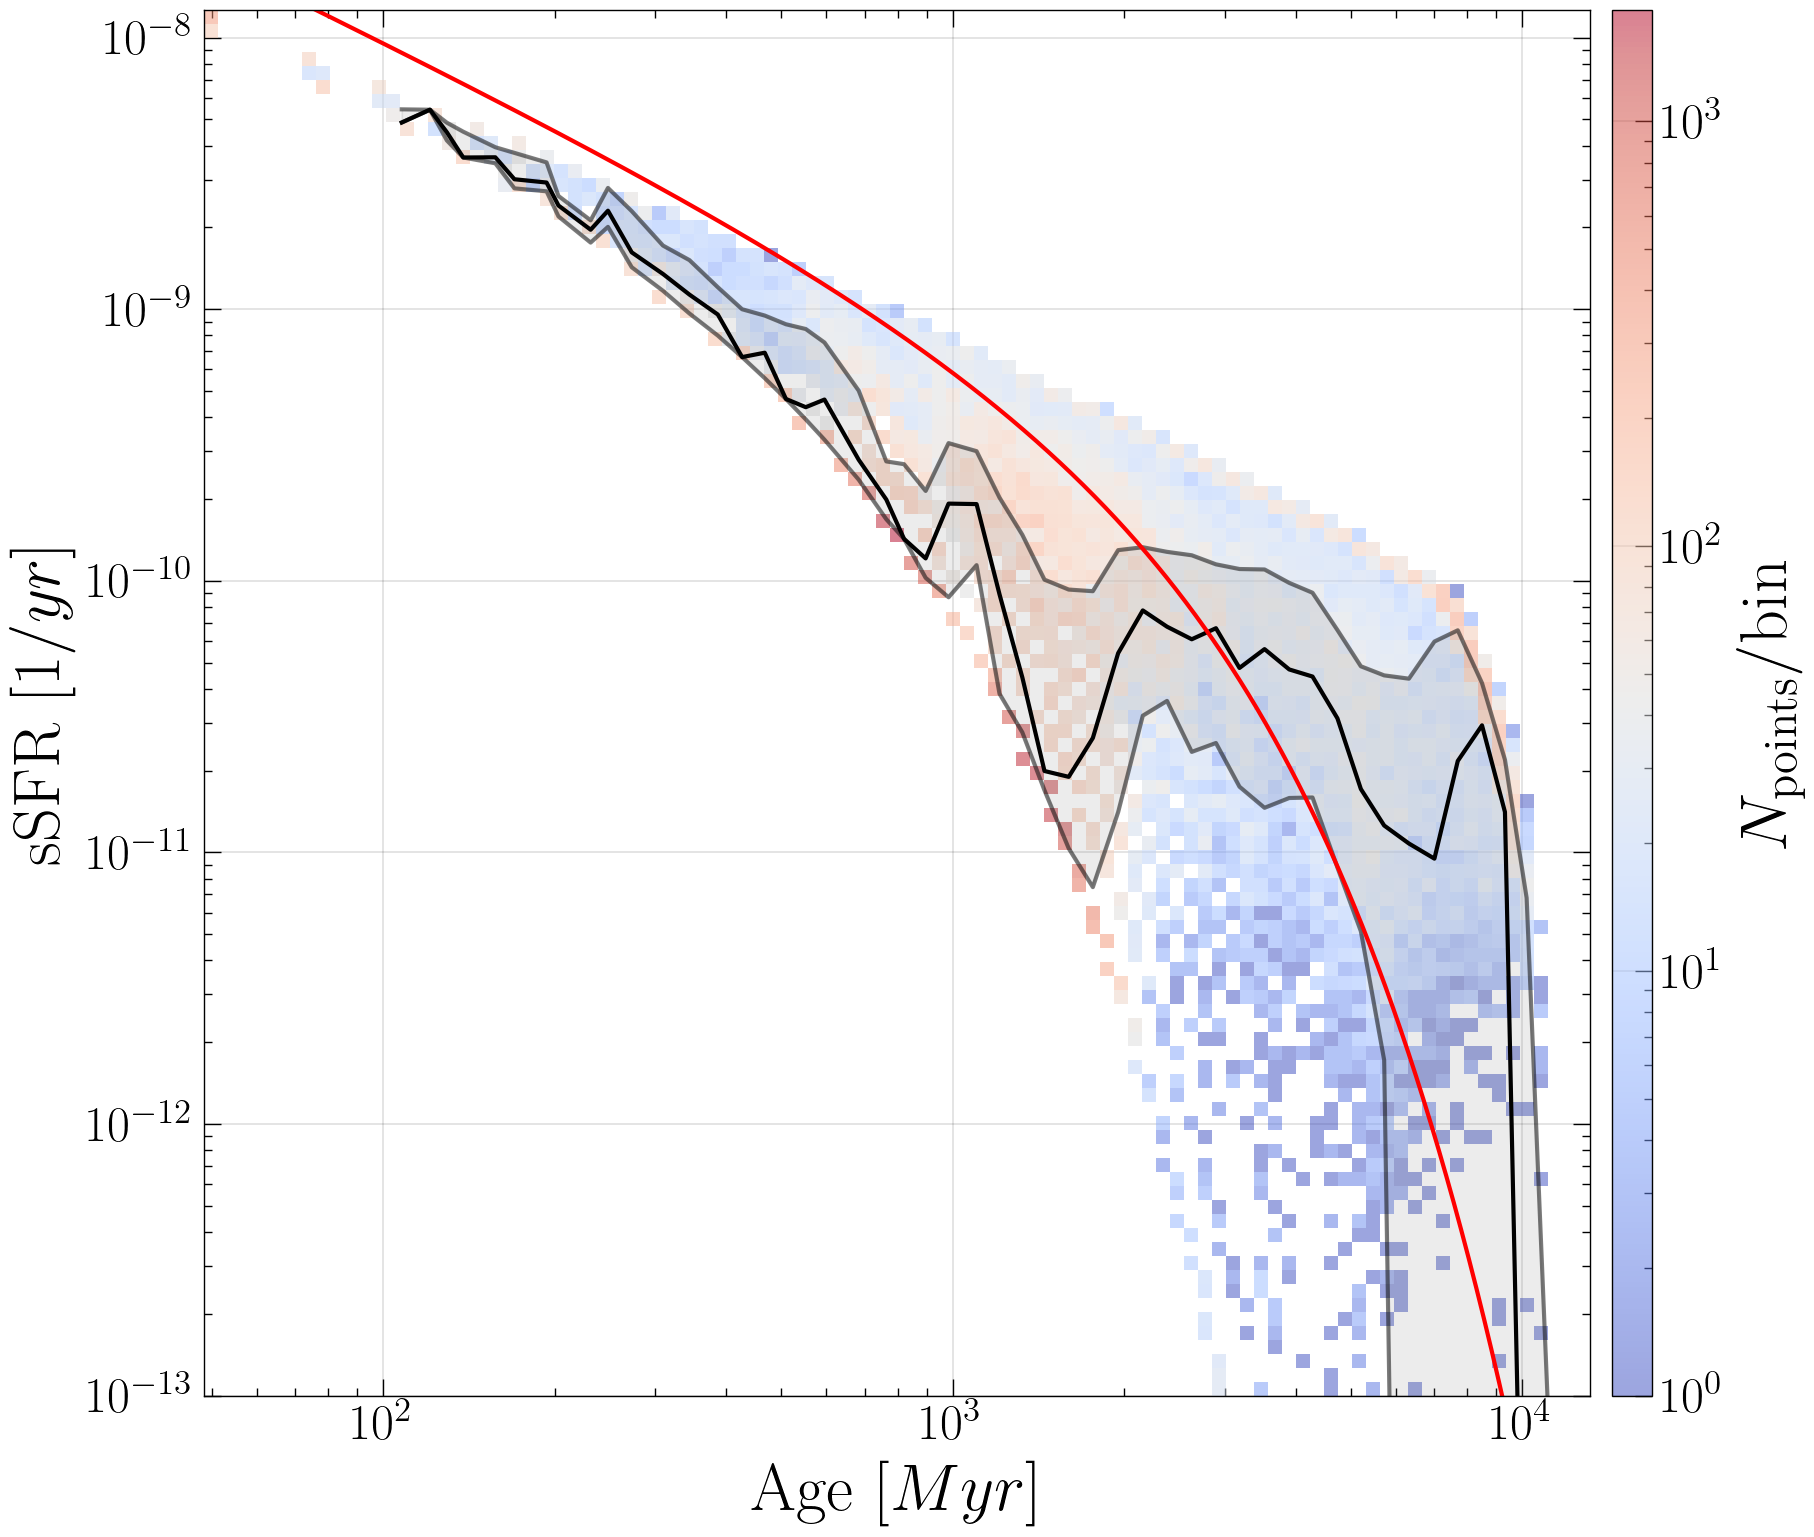

In [8]:
x_data = results['best.stellar.age_m_star']
y_data = results['best.sfh.sfr10Myrs']/results['best.stellar.m_star']
    
fig, ax, statistics, hist = Plot(x_data, y_data, 'Age $[Myr]$', 'sSFR $[1/yr]$', 
                                 y_min=1e-13, x_min_bins=1e2, xbins=50, hist2d_nbins=100)
ax.plot(age, sSFR_points, color='red');

Abbiamo galassie con sSFR più alto rispetto al modello (closed-box).\
Mantenendo closed-box, avremmo bisogno di un $t_{dyn}$ più basso (--> $\epsilon'$ più alto) e quindi ($t_{dyn} \propto \rho^{-1/2}$) di galassie più dense!

Quindi:
- aumentiamo $t_{dyn}$ e vediamo quale descrive bene le $Age$ elevate;
- se possibile, calcoliamo le densità delle galassie e vediamo se sono maggiori. Fossati dice che ricavare le densità a partire dai dati di Cigale (size che contiene 50% della luminosità $\propto$ raggio galassia) è molto complicato.

Open-box --> inflow di massa

Rotational curve galassia --> Rotazione in alone 

Cambiare massa di un fattore 10 fa cambiare le velocità di radice di 10 at most
**cambiare raggio e velocità viriale(massa) cambia davvero poco per tdyn!!**

Modelllo closed-box --> sSFR deve scendere per forza, difficile che io trovi MS

300/400 km/s 

## 1.2) sSFR vs Mass with age colormap

We see that the galaxies that are not described by the model (keeping Kennicut's numbers) are the old and star-forming ones, i.e. the red ones in this plot

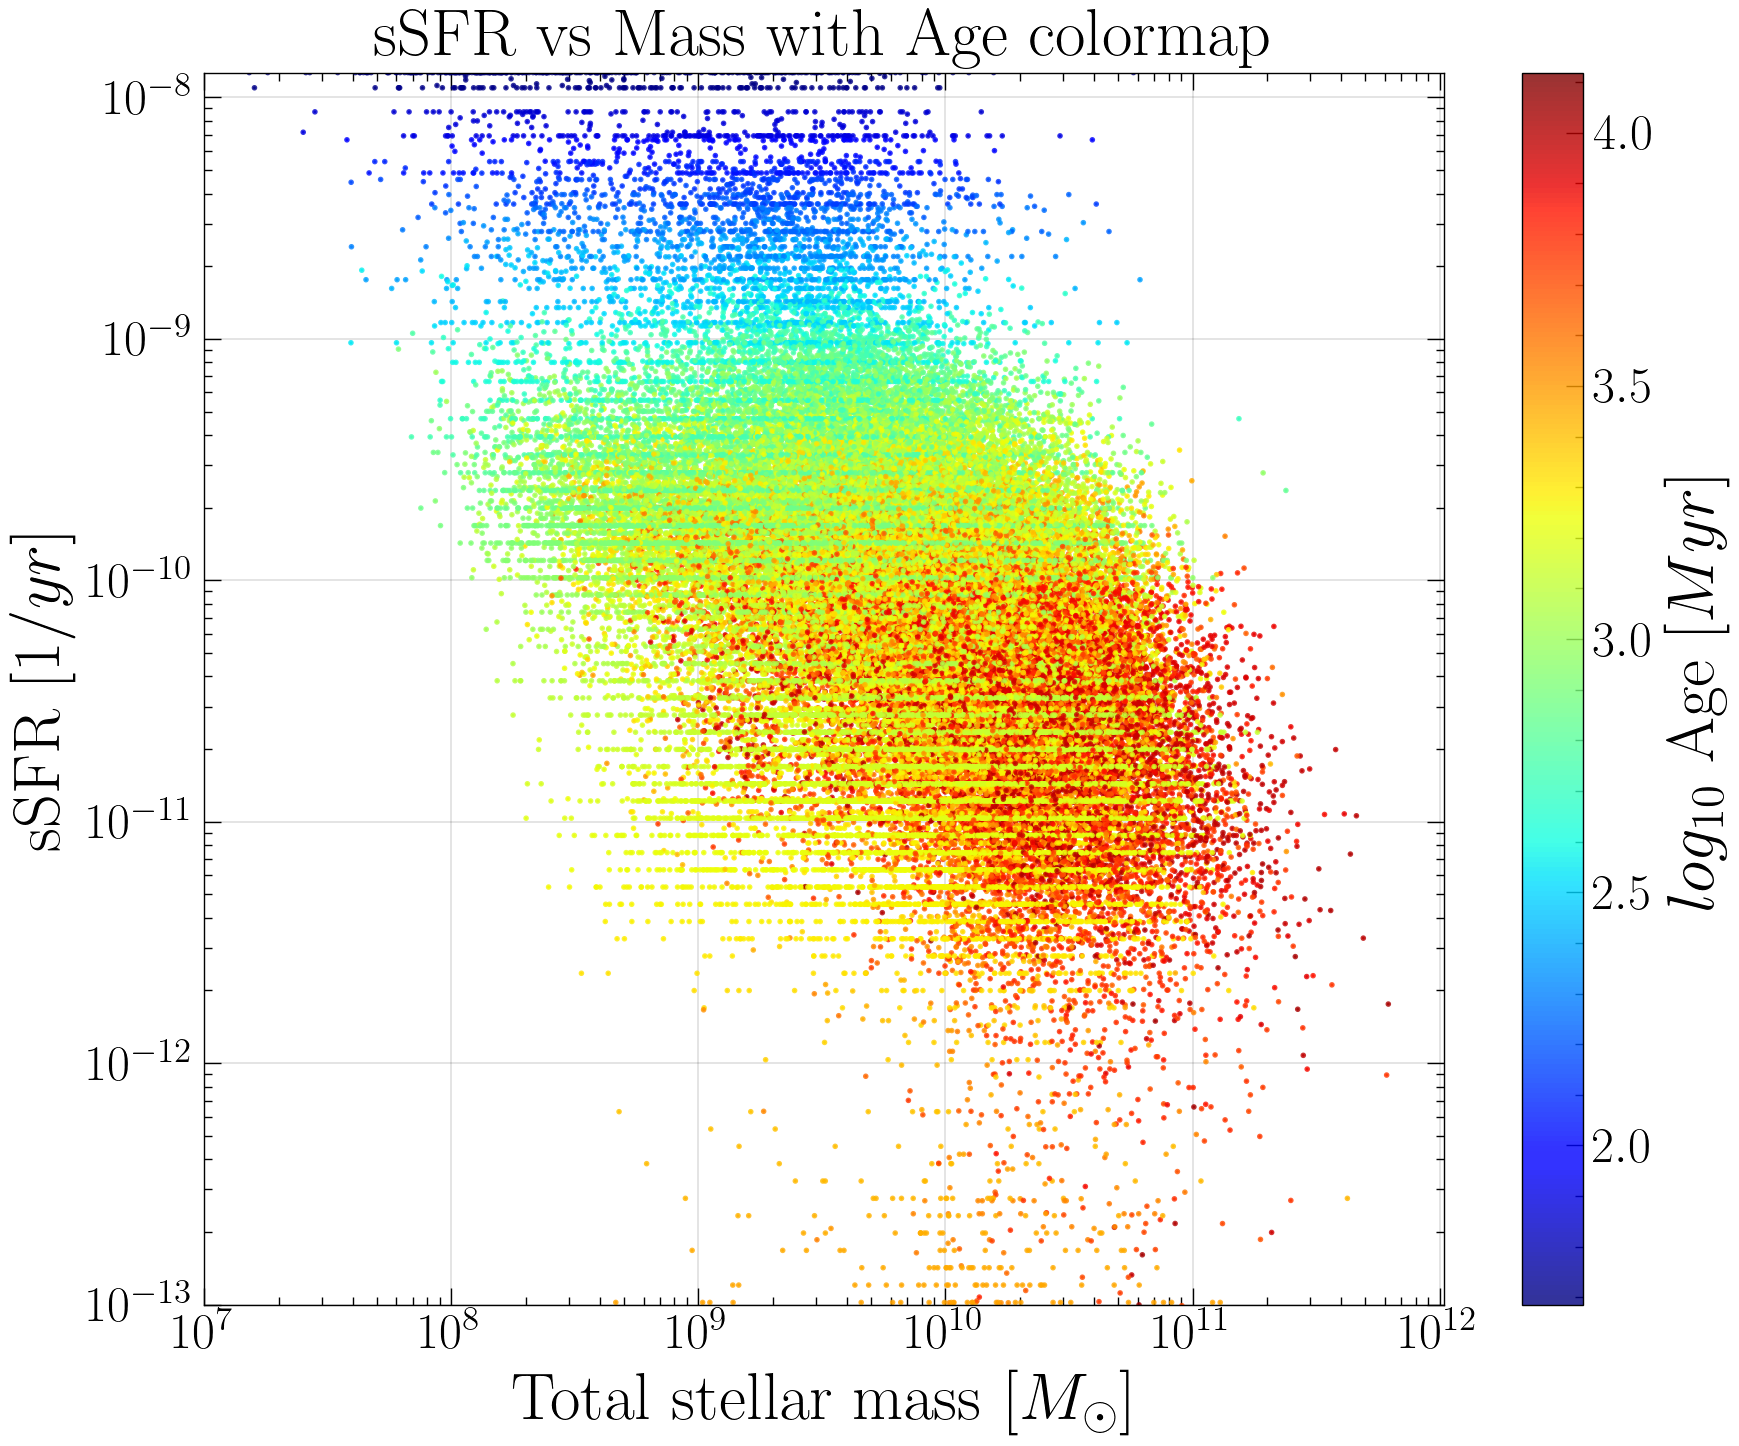

In [9]:
x_data = results['best.stellar.m_star']
y_data = results['best.sfh.sfr10Myrs']/results['best.stellar.m_star']
colormap_age = np.log10(results['best.stellar.age_m_star'])

plt.rcParams['figure.figsize'] = [10 , 8]

x_min = 1e7
x_max = np.max(x_data)
y_min = 1e-13
y_max = np.max(y_data)
hist2d_nbins = 200

plt.title(f'sSFR vs Mass with Age colormap')
plt.scatter(x_data, y_data, c=colormap_age, cmap=plt.cm.jet, alpha=0.8, s=1)
plt.colorbar(label='$log_{{10}}$ Age $[Myr]$')

plt.xscale('log')
plt.yscale('log')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xlabel('Total stellar mass $[M_\\odot]$')
plt.ylabel('sSFR $[1/yr]$');

## 1.3) Searching for a $t_{\rm dyn}$ which fits the old star-forming galaxies

Cambiamo $t_{dyn}$ per vedere quale possa descrivere le galassie vecchie con alto $sSFR$ e troviamo la $\rho$ che dovrebbero avere (dovrebbe essere ***unphysical***)

In [10]:
# Define our variables from Kennicut
epsilon = 0.02 
tdyn = np.linspace(2* 10**7,  10**8.5, 6) # in years

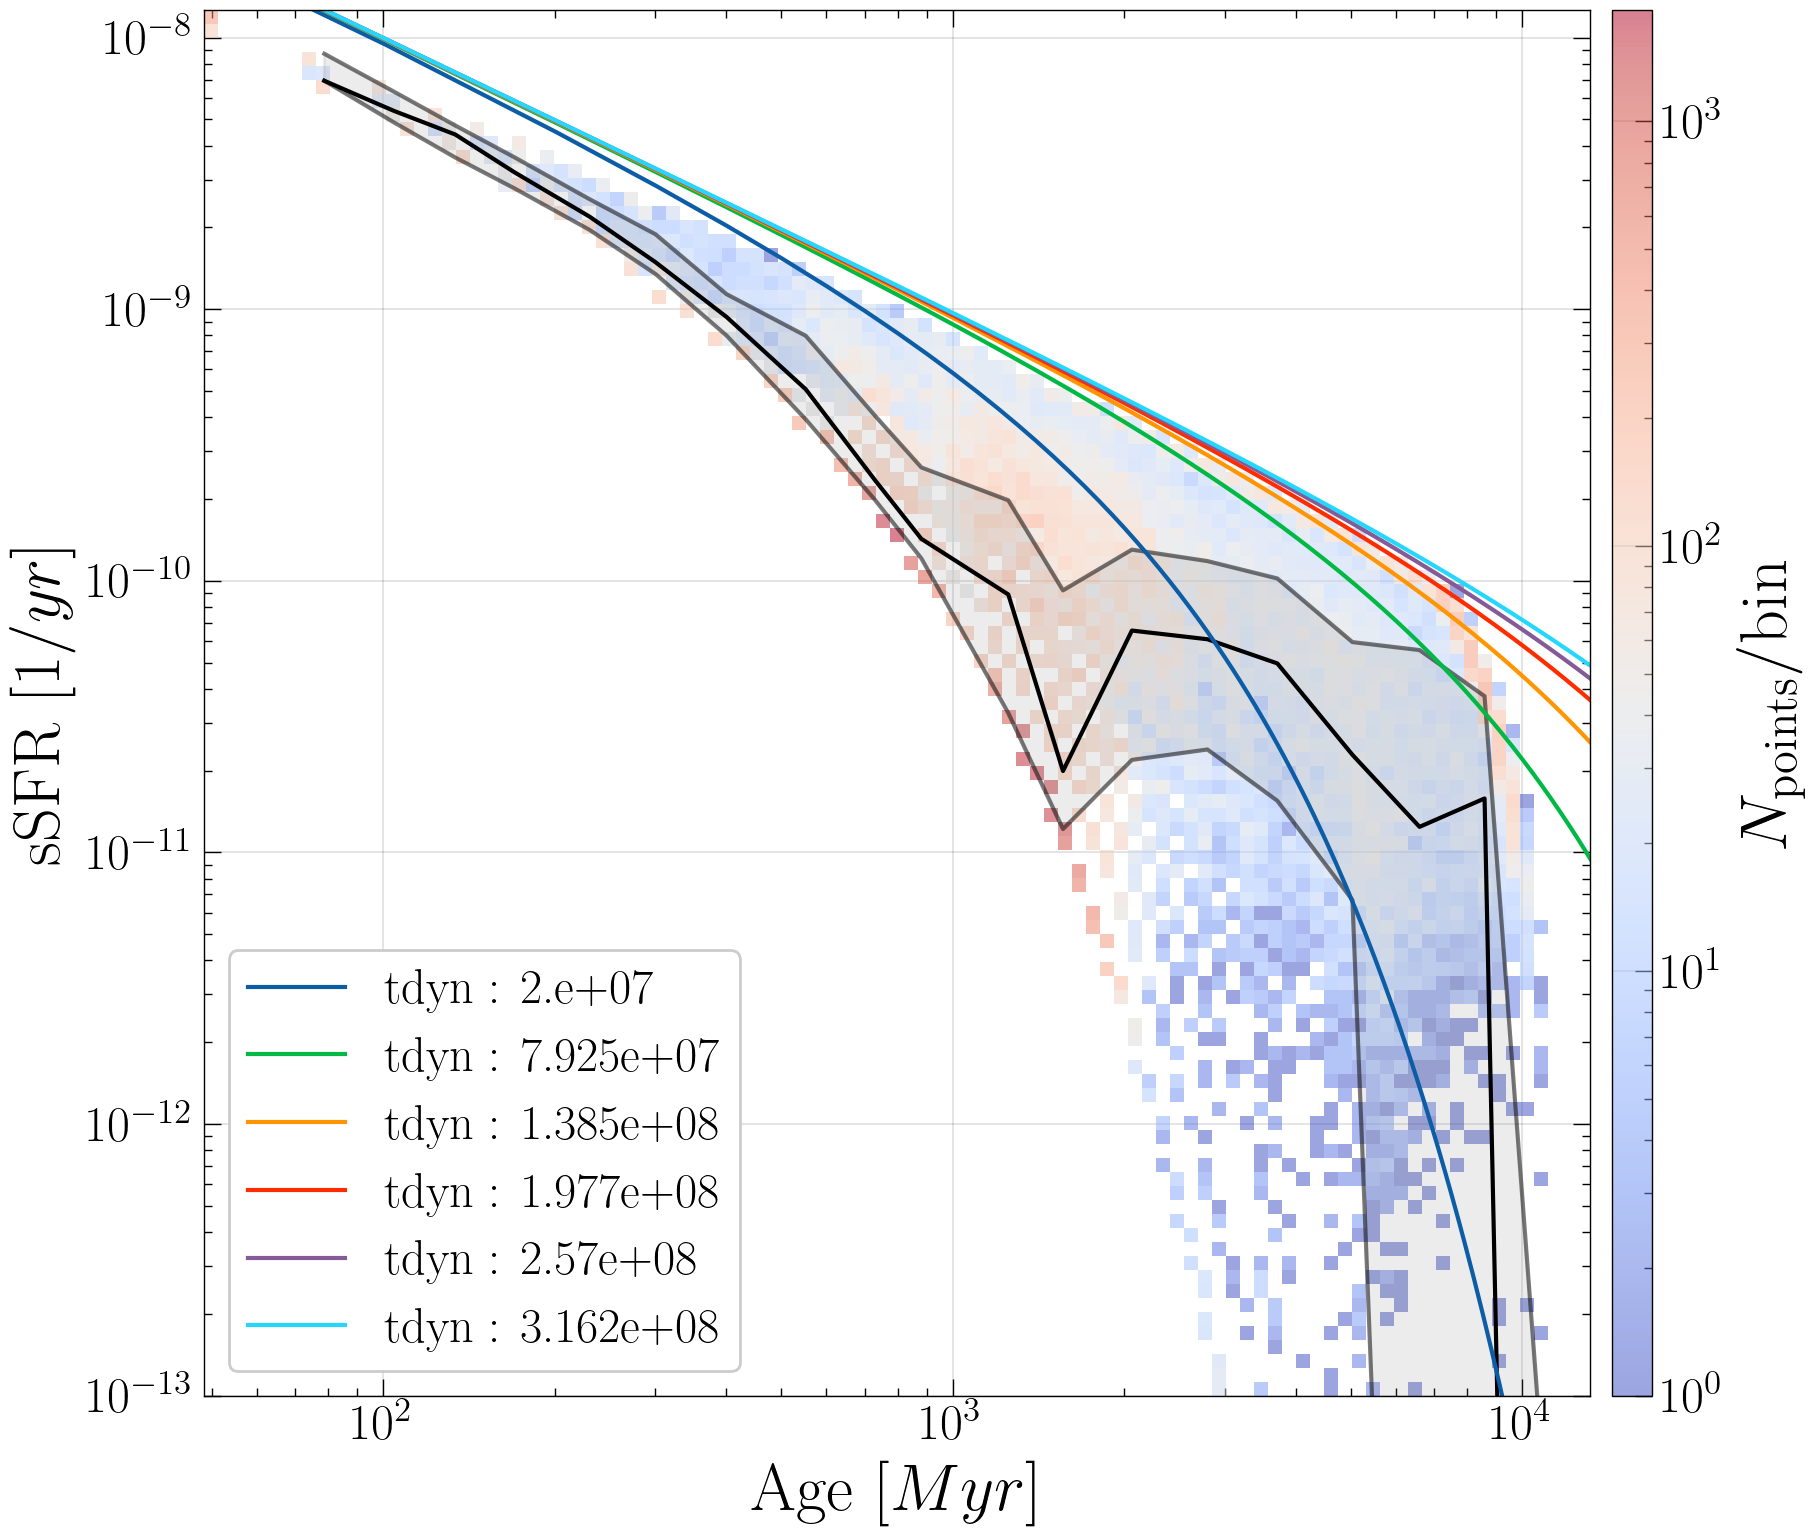

In [11]:
x_data = results['best.stellar.age_m_star']
y_data = results['best.sfh.sfr10Myrs']/results['best.stellar.m_star']

age = np.linspace(10**0, 10**5, 1000) # in Myr

fig, ax, statistics, hist = Plot(x_data, y_data, 'Age $[Myr]$', 'sSFR $[1/yr]$', 
                                 y_min=1e-13, xbins=20, hist2d_nbins=100)

for td in tdyn:
    sSFR_points = sSFR(age*10**6, epsilon, td) # in years
    ax.plot(age, sSFR_points, label = f"tdyn : {np.format_float_scientific(td, 3)}")

ax.legend(loc='lower left');

Let's see how the radius goes

In [12]:
radius_1_2 = tdyn / (2*10**7) * 4 # kpc
print(tdyn, "\n", radius_1_2)

[2.00000000e+07 7.92455532e+07 1.38491106e+08 1.97736660e+08
 2.56982213e+08 3.16227766e+08] 
 [ 4.         15.84911064 27.69822128 39.54733192 51.39644256 63.2455532 ]


**Circular velocity doesn't change that much!! 100-300 km/s -- big change is radius**


see Shen 2003 ---> "the sky distribution of galaxies in the sdss" ---> guardiamo size-mass relation ----> non ci sono galassie con raggi così grossi !

size -mass relation in sdss

**Guardiamo class 6 per capire se usare bayes o best!!!**

## 1.4) Estimate of $\tau_{\rm dyn} (M_{\rm star})$

Assumption from Ubler et al: $v_{circ} [km/s] \, = \, v_{ref} \,  \left(\dfrac{M_{star}[M_\odot]}{10^b}\right)^{1/a}$, where $a=3.6$, $b=10.5$, $v_{ref}=242km/s$

Assumption from Van der Wel et al: $R_{circ} [kpc] \, = \, A \left(\dfrac{M_{star}[M_\odot]}{M_{ref}}\right)^\alpha$, where $M_{ref}=5 \times 10^{10}[M_\odot]$


In [13]:
def f_radius_1_2(mass_star, A, alpha):
    return A*(mass_star/5e10)**alpha

def f_v_circ(mass_star):
    return 242*(mass_star/10**10.5)**(1/3.6)

def f_t_dyn(radius_1_2, v_circ):
    return 2e7*(radius_1_2/4)/(v_circ/200)

In [14]:
redshift = np.array([0.25, 0.75, 1.25, 1.75, 2.25, 2.75])
A = 10**(np.array([0.86, 0.78, 0.7, 0.65, 0.55, 0.51]))
alpha = np.array([0.25, 0.22, 0.22, 0.23, 0.22, 0.18])

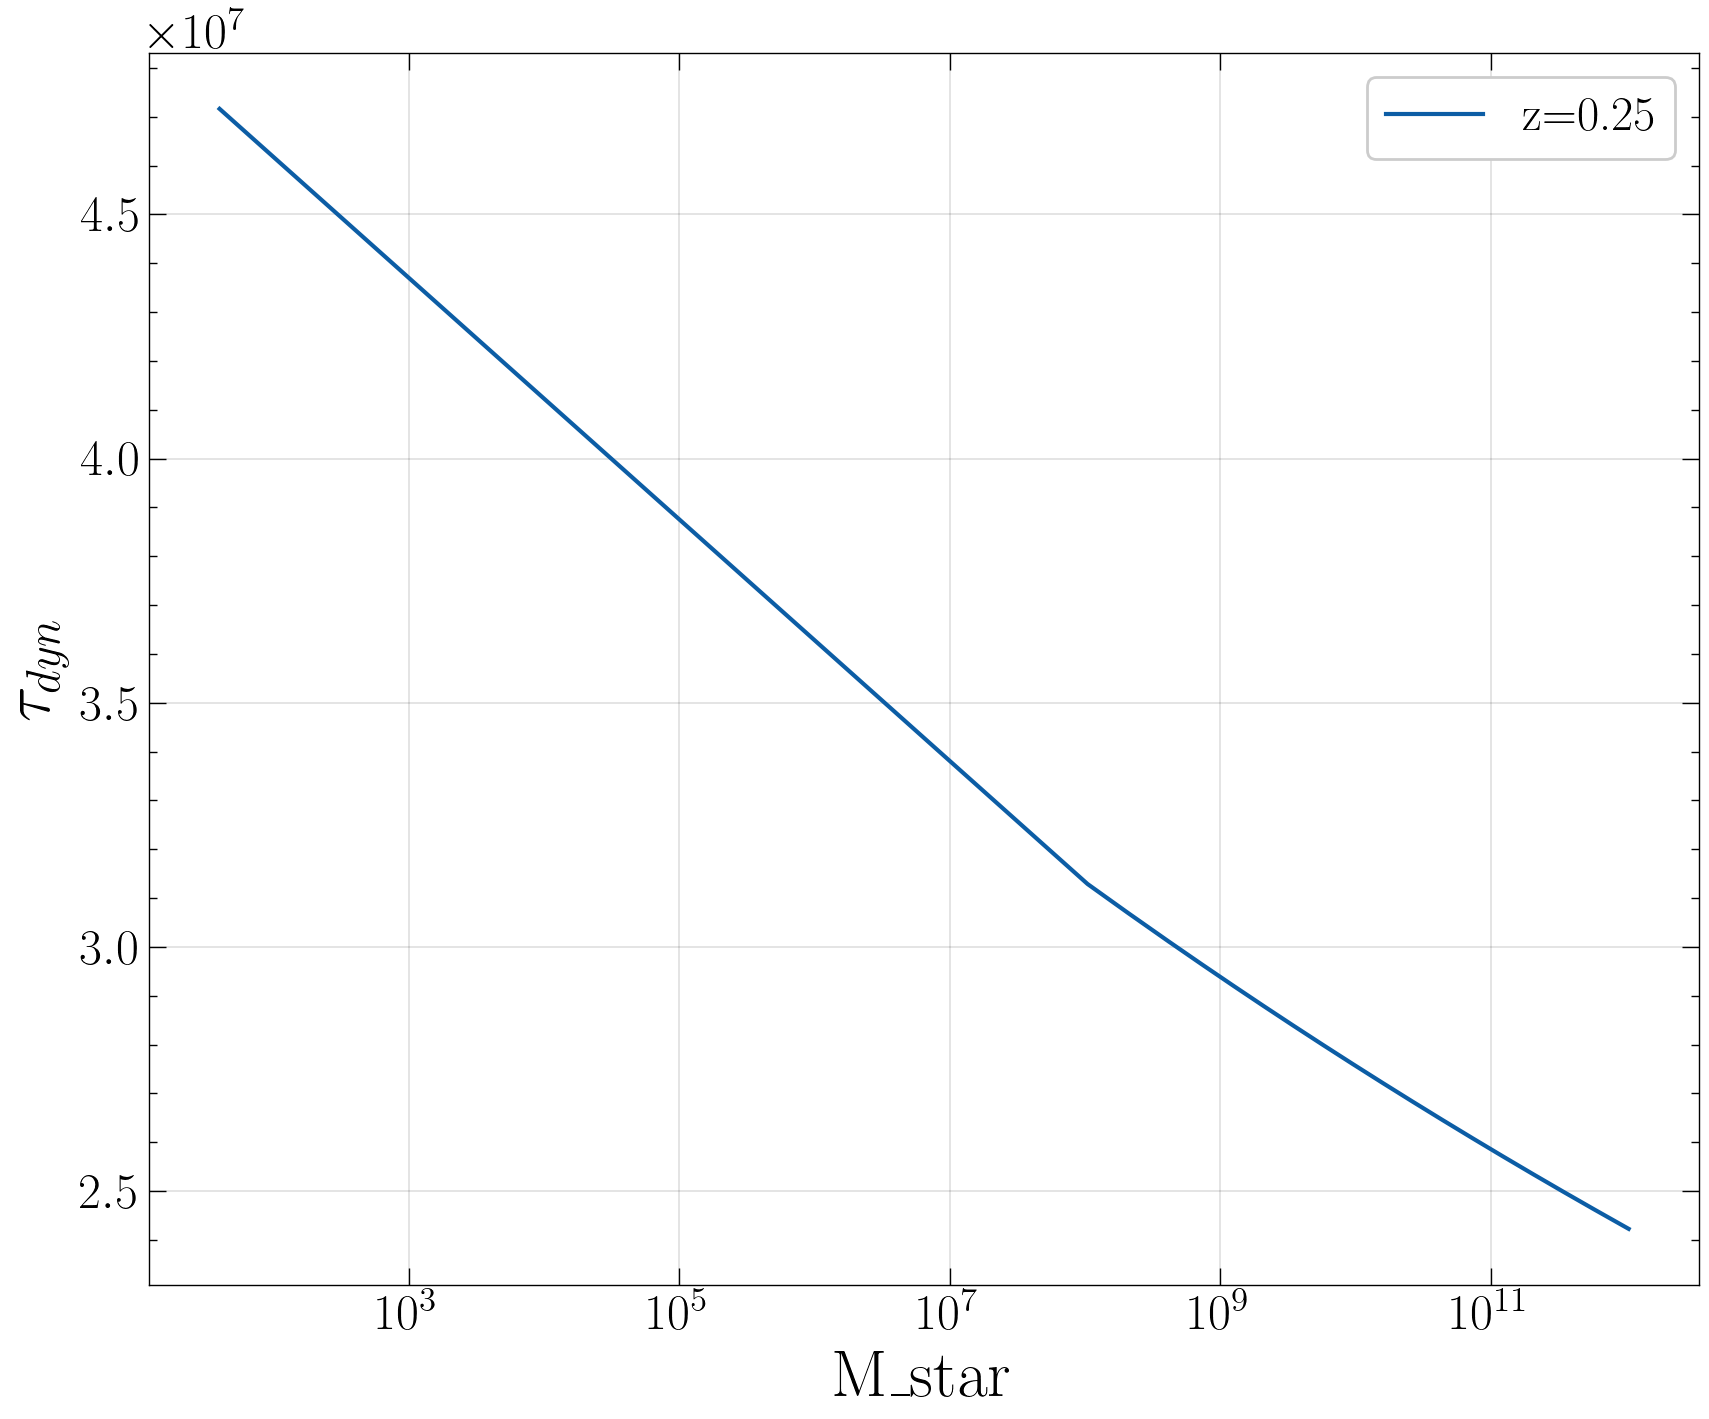

In [15]:
mass_star = results['best.stellar.m_star']
x_dense = np.linspace(np.min(mass_star), np.max(mass_star), 10000)
t_dyn = f_t_dyn(f_radius_1_2(x_dense, A[0], alpha[0]), f_v_circ(x_dense))

plt.plot(x_dense, t_dyn, label=f'z={redshift[0]:.2f}')
plt.xscale('log')
plt.xlabel('M_star')
plt.ylabel('$\\tau_{dyn}$')
plt.legend();

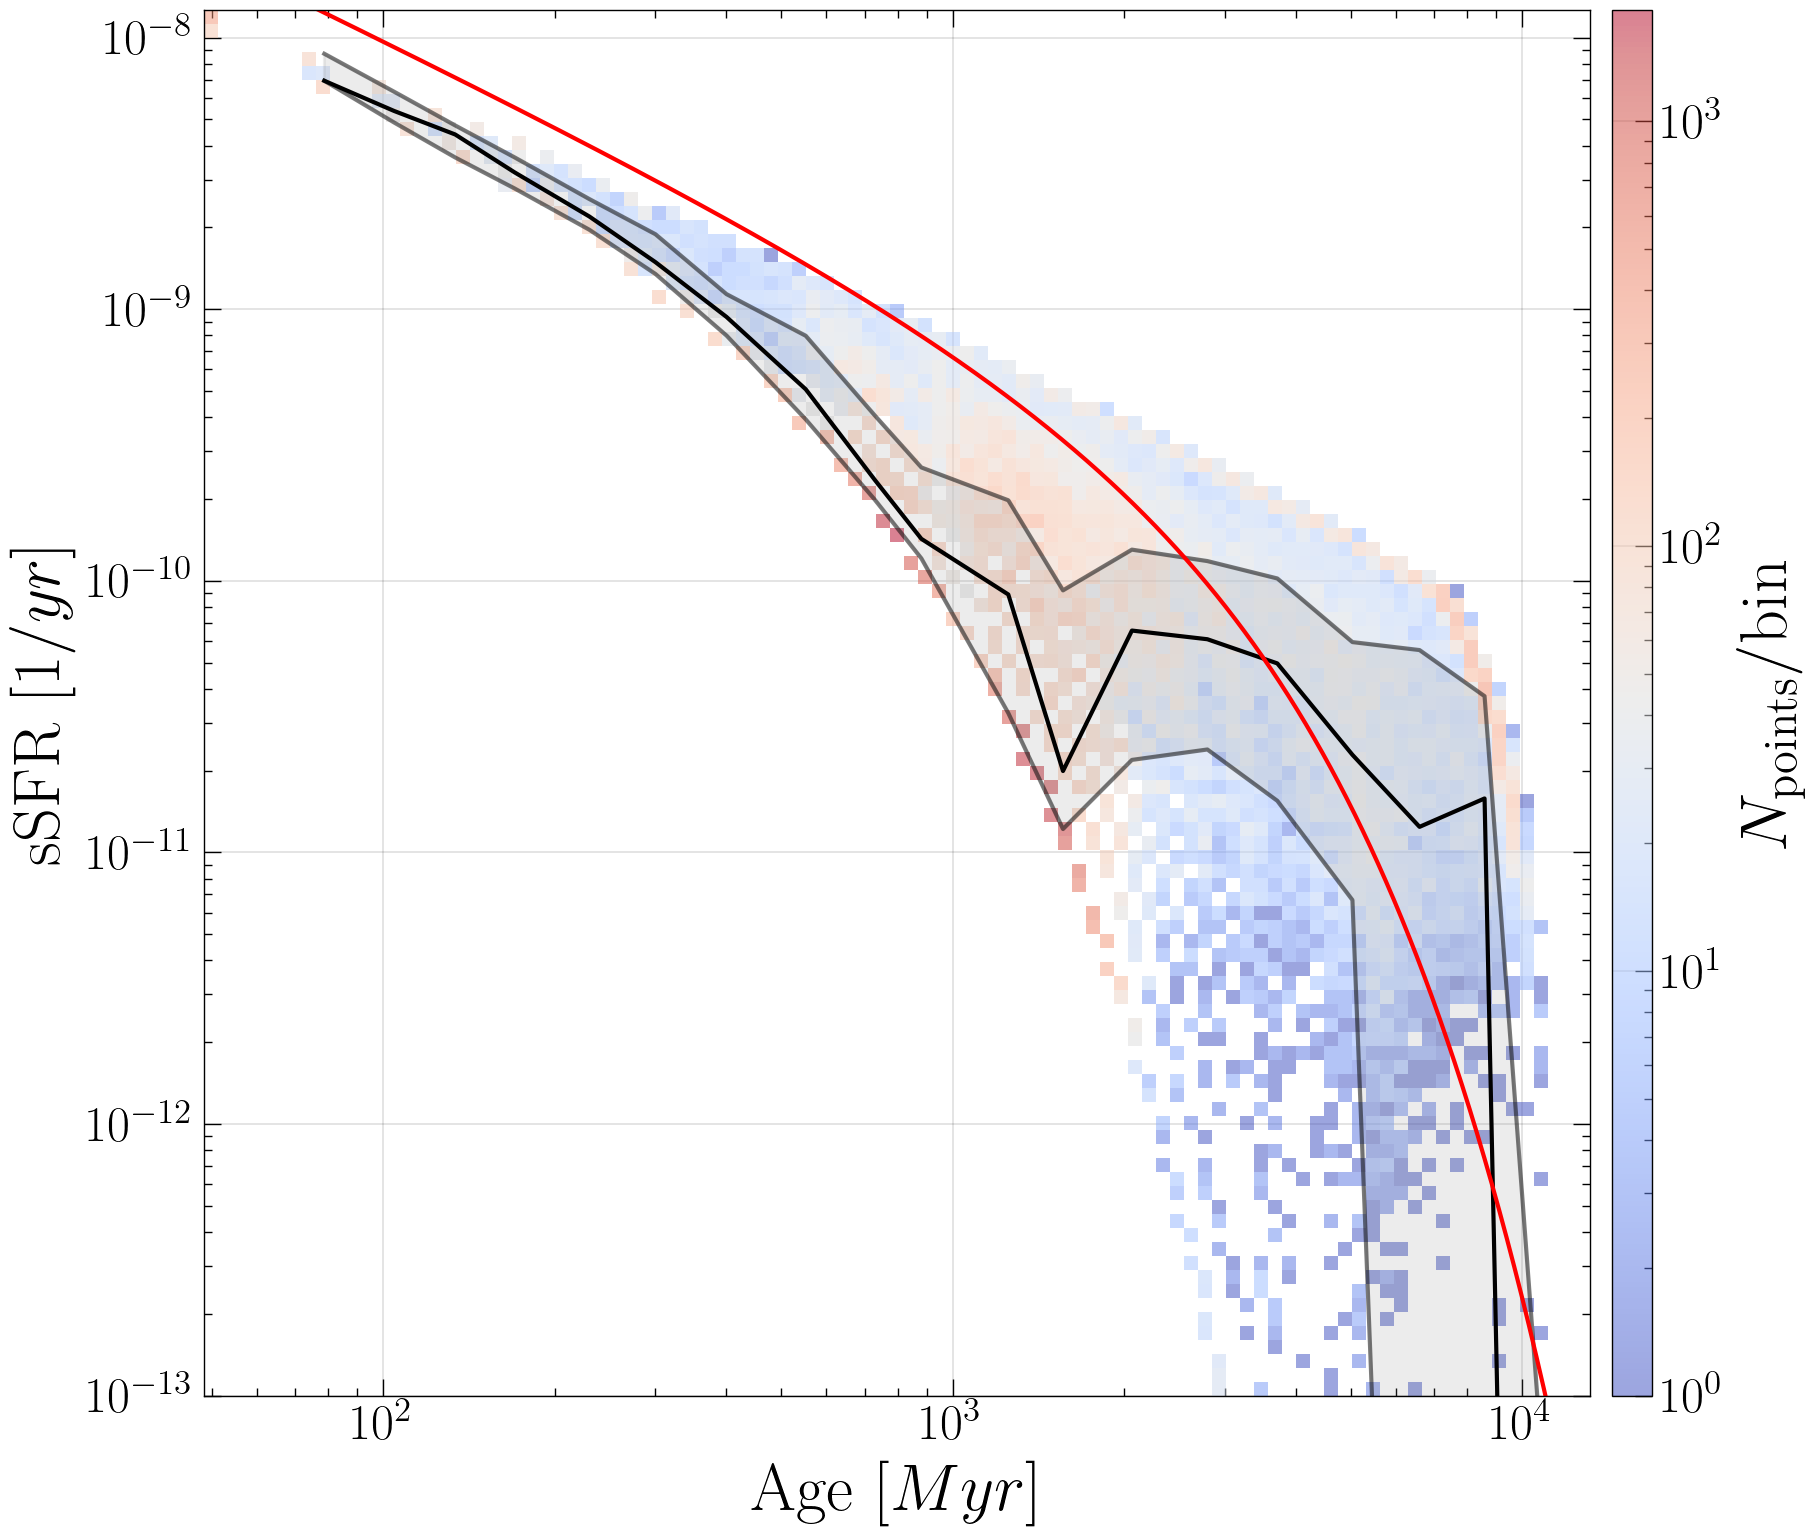

In [16]:
x_data = results['best.stellar.age_m_star']
y_data = results['best.sfh.sfr10Myrs']/results['best.stellar.m_star']
x_dense = np.linspace(np.min(x_data), np.max(x_data), 10000)
sSFR_points = sSFR(x_dense*10**6, epsilon, t_dyn) #in years 
    
fig, ax, statistics, hist = Plot(x_data, y_data, 'Age $[Myr]$', 'sSFR $[1/yr]$', 
                                 y_min=1e-13, xbins=20, hist2d_nbins=100)
ax.plot(x_dense, sSFR_points, color='red');

The closed-box model does not correctly explain the two subpopulations.\
To addres this, we should include the exchange of matter among galaxies in our model, which we have neglected so far.

# 2) Metallicity as a function of the age

$Z(t) \, = \, Y \, \epsilon' \, (t-t_0)$

In [17]:
Z_sun = 0.02

def f_metallicity(age, Y, epsilon, tdyn):
    epsilon_primed = epsilon / tdyn
    Z = Y*epsilon_primed*age
    return 8.69+np.log10(Z/Z_sun)

In [18]:
epsilon = 0.02 
tdyn = 2*10**7
Y = 30000

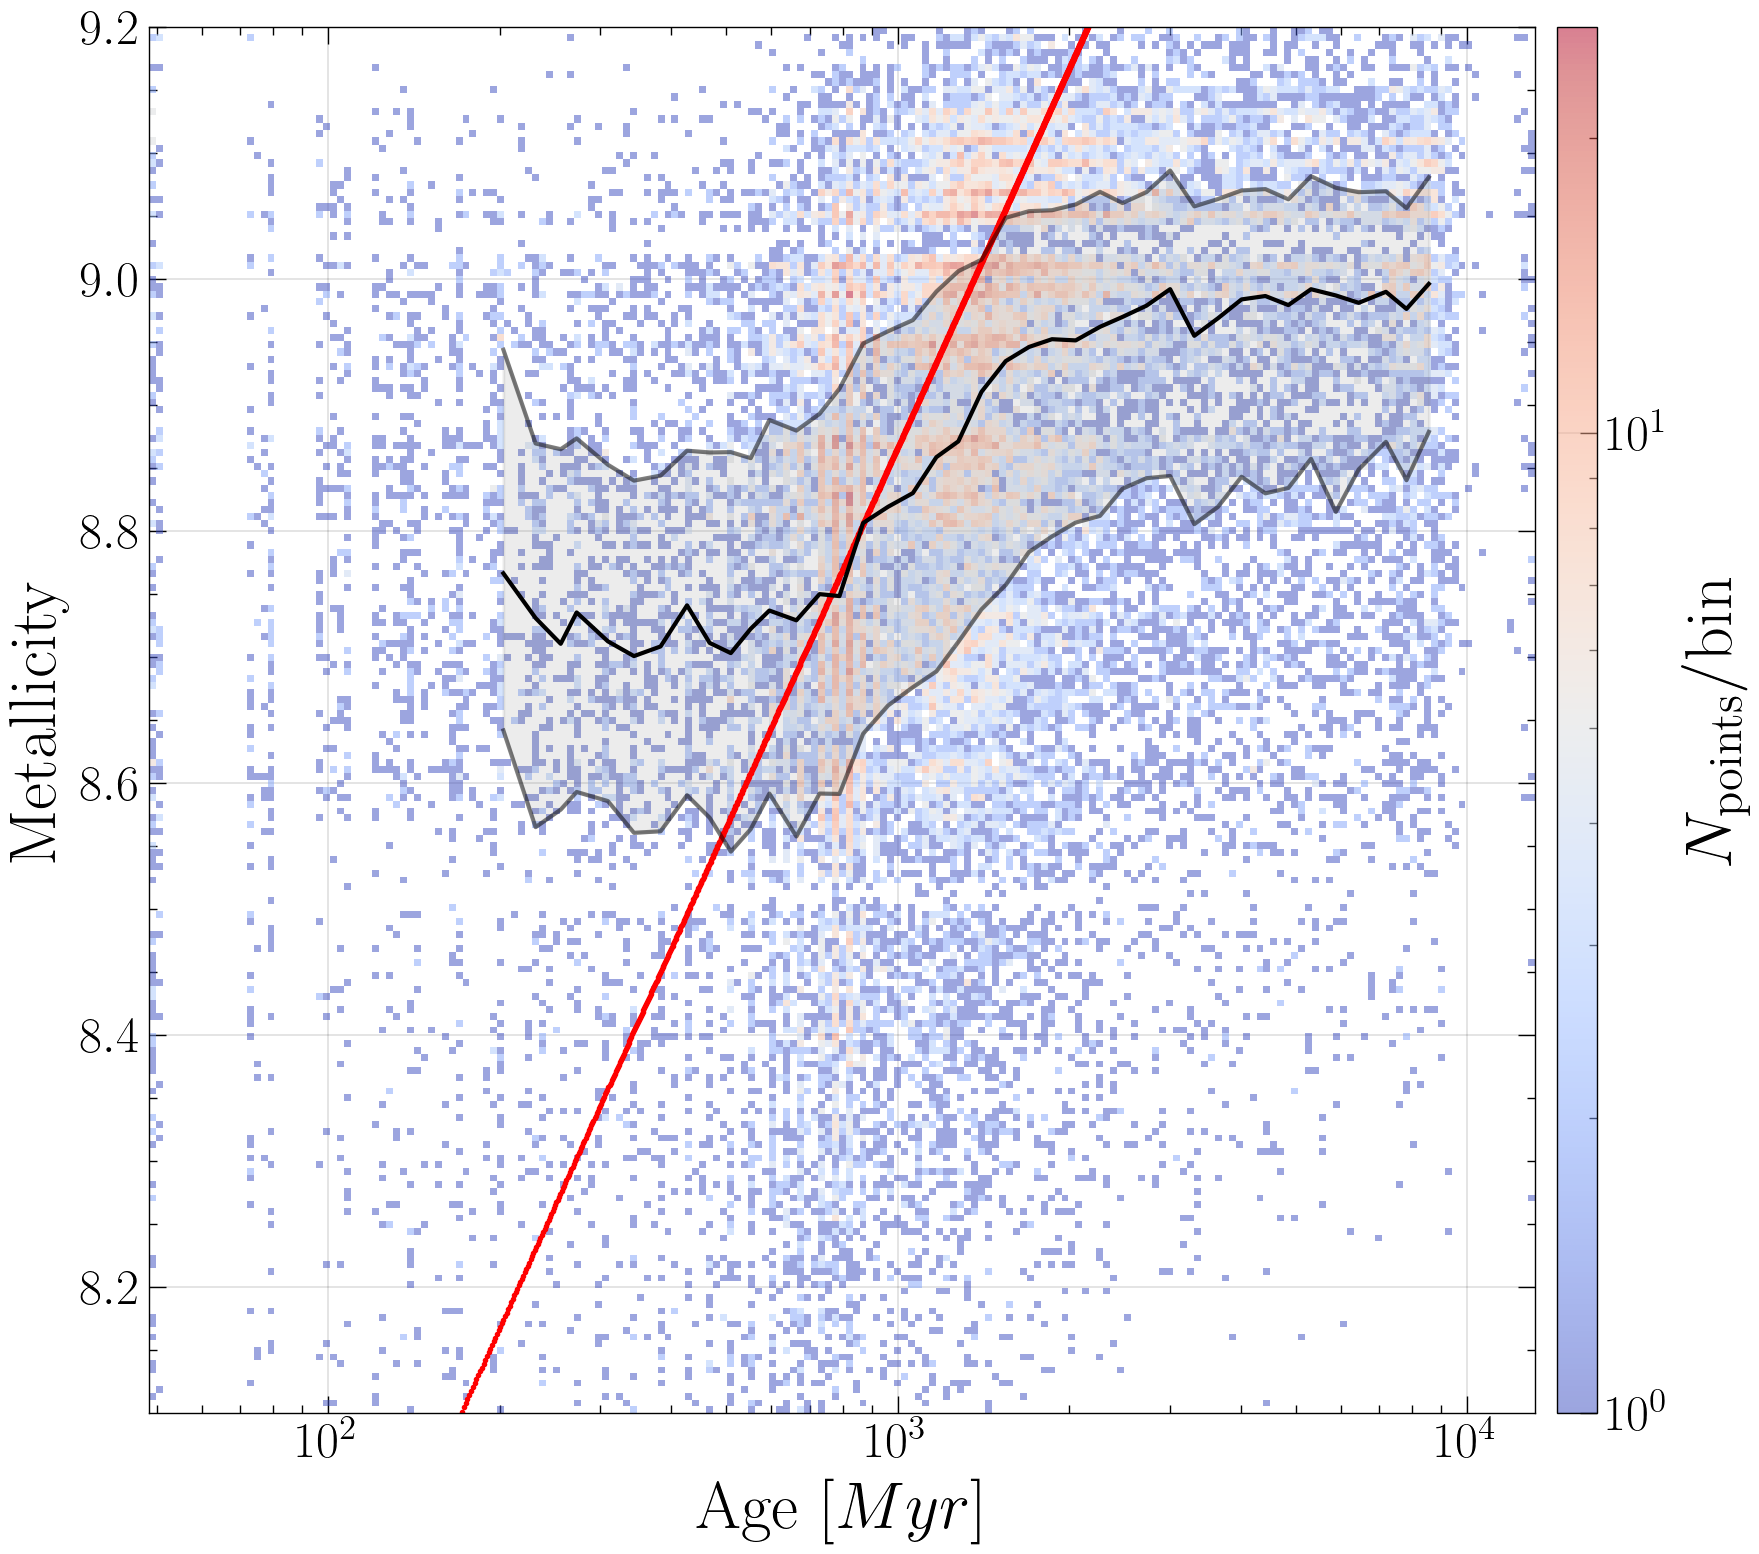

In [19]:
data_Z = Table.read('SDSS_LAB2024_spectroscopy.fits', format='fits')
data_Z = data_Z.to_pandas()

mask = data_Z['log_oh']>-4

x_data = results['best.stellar.age_m_star'][mask]
y_data = data_Z['log_oh'][mask]
x_dense = np.linspace(np.min(x_data), np.max(x_data), 10000)
metallicity = f_metallicity(x_dense, Y, epsilon, tdyn)

fig, ax, statistics, hist = Plot(x_data, y_data, 'Age $[Myr]$', 'Metallicity', 
                                 ylog=False, y_min=8.1, y_max=9.2, x_min_bins=2e2, x_max_bins=9e3)
ax.scatter(x_dense, metallicity, s=1, color='red');

# 3) Open-box: sSFR at equilibrium

## 3.1) $\dot{M}_{\rm gas}^{\rm in}(t)$ as a function of $M_{\rm star}(t)$, $\eta$ and $R$ assumed constant

Let's assume that $\dot{M}^{\rm out}_ {\rm gas}(t) = \eta SFR(t) = \eta \epsilon'M_{\rm gas}(t)$, i.e. that the outflow of gas-mass is dominated by the supernova IIA contribution.

$\color{lime}{\dfrac{dM_{\rm gas}(t)}{dt} \, = \, \dot{M}_{\rm gas}^{\rm in}(t) - (1+\eta-R)\epsilon'M_{\rm gas}(t)}$

We can consider two extremal scenarios:

- if $\dot{M}_{\rm gas}^{\rm in}(t) \gg (1+\eta-R)\epsilon'M_{\rm gas}(t)$, then $M_{\rm gas}(t) = M_{\rm gas}(t_0) + M_{\rm gas}^{\rm in}(t)$  
$M_{\rm gas}(t)$ increases with time, until the condition is not valid anymore.

- if $\dot{M}_{\rm gas}^{\rm in}(t) \ll (1+\eta-R)\epsilon'M_{\rm gas}(t)$, then $M_{\rm gas}(t) = M_{\rm gas}(t_0)\exp{[-(1+\eta-R) (t-t_0)]}$   
It is the closed-box limit.  
$M_{\rm gas}(t)$ decreases with time, until the condition is not valid anymore.

We can also consider the $\color{red}\rm equilibrium \, scenario$: if $\dot{M}_{\rm gas}^{\rm in}(t) = (1+\eta-R)\epsilon'M_{\rm gas}(t)$, then $\dfrac{dM_{\rm gas}(t)}{dt} = 0$ and so $\color{lime}{M^{\rm eq}_{\rm gas}(t) = \dfrac{\dot{M}_{\rm gas}^{\rm in}(t)}{(1+\eta-R)\epsilon'}}$

$SFR^{\rm eq}(t) = \dfrac{\dot{M}_{\rm gas}^{\rm in}(t)}{1+\eta-R} \:\: \Longrightarrow \:\: \color{lime}{sSFR^{\rm eq}(t) = \dfrac{\dot{M}_{\rm gas}^{\rm in}(t)}{1+\eta-R} \, \dfrac{1}{M_{\rm star}(t)}}$

<br>

We would like to express $\dot{M}_{\rm gas}^{\rm in}(t)$ as a function of $M_{\rm star}(t)$.

$\color{lime}{\dot{M}_{\rm gas}^{\rm in}(t) = \xi \, \dot{M}_{\rm halo,\rm gas}^{\rm in}(t) = \xi \, f_b \, \dot{M}_{\rm halo}^{\rm in}(t)}$

We assume:
$\xi =
\begin{cases}
    0 \:\:\:\: {\rm If} \: \tau_{\rm cool} > \tau_{\rm free-fall} \: , \: {\rm i.e.} \: M_{\rm halo} < M_{\rm crit}(z) \: , \: {\rm i.e. \: the \: halo \: is \: in \: hydrostatic \: equilibrium}\\
    1 \:\:\:\: {\rm If} \: \tau_{\rm cool} < \tau_{\rm free-fall} \: , \: {\rm i.e.} \: M_{\rm halo} > M_{\rm crit}(z) \: , \: {\rm i.e. \: the \: halo \: is \: NOT \: in \: hydrostatic \: equilibrium}
\end{cases}$

where $\tau_{\rm cool} = \dfrac{3 n k_B T_{\rm vir}}{2 n^2 \Lambda(T_{\rm vir})}$.

In the case of $z=0$, we can assume that $\xi = 1$ for $M_{\rm halo} \in (10^9 M_\odot, 10^{12} M_\odot)$.

<br>

However, we don't know neither $\dot{M}_{\rm halo}^{\rm in}(t)$ nor $M_{\rm halo}(t)$ and we would like to estimate them as functions of $M_{\rm star}$:

McBride et all: $\color{lime}{\dot{M}_{\rm halo}^{\rm in}(t) = 42 M_{\odot} yr^{-1} \left(\dfrac{M_{\rm halo}}{10^{12}M_{\odot}}\right)^{1.127} (1+1.17z) \sqrt{(1+z)^3 \Omega_m + \Omega_\Lambda}}$

Moster et all provides an empirical relation: $\dfrac{M_{\rm star}}{M_{\rm halo}} = 2N \left[\left(\dfrac{M_{\rm halo}}{M_1}\right)^{-\beta} + \left(\dfrac{M_{\rm halo}}{M_1}\right)^\gamma\right]^{-1}$, where $N$, $M_1$, $\beta$ and $\gamma$ are just parameters whose estimates can be found in the paper.

We have to numerically invert the $M_{\text{star}}(M_{\text{halo}})$ relation.

**Careful!!!** We are assuming $z=z_{\rm mean}$ at the time of observation.

In [20]:
z_mean = np.mean(data['redshift'])
z_mean

0.053807276843311734

In [21]:
def M_1(z):
    M_10 = 11.590
    M_11 = 1.195
    return 10 ** (M_10 + M_11 * z / (z + 1))

def N(z):
    N_10 = 0.0351
    N_11 = -0.0247
    return N_10 + N_11 * z / (z + 1)

def beta(z):
    beta_10 = 1.376
    beta_11 = -0.826
    return beta_10 + beta_11 * z / (z + 1)

def gamma(z):
    gamma_10 = 0.608
    gamma_11 = 0.329
    return gamma_10 + gamma_11 * z / (z + 1)

def m_star_m_halo(M, z):
    a = (M / M_1(z)) ** (-beta(z))
    b = (M / M_1(z)) ** (gamma(z))
    return 2 * M * N(z) / (a + b)

In [22]:
M_grid = np.logspace(8, 16, 10000)

m_star = m_star_m_halo(M_grid, z=z_mean)

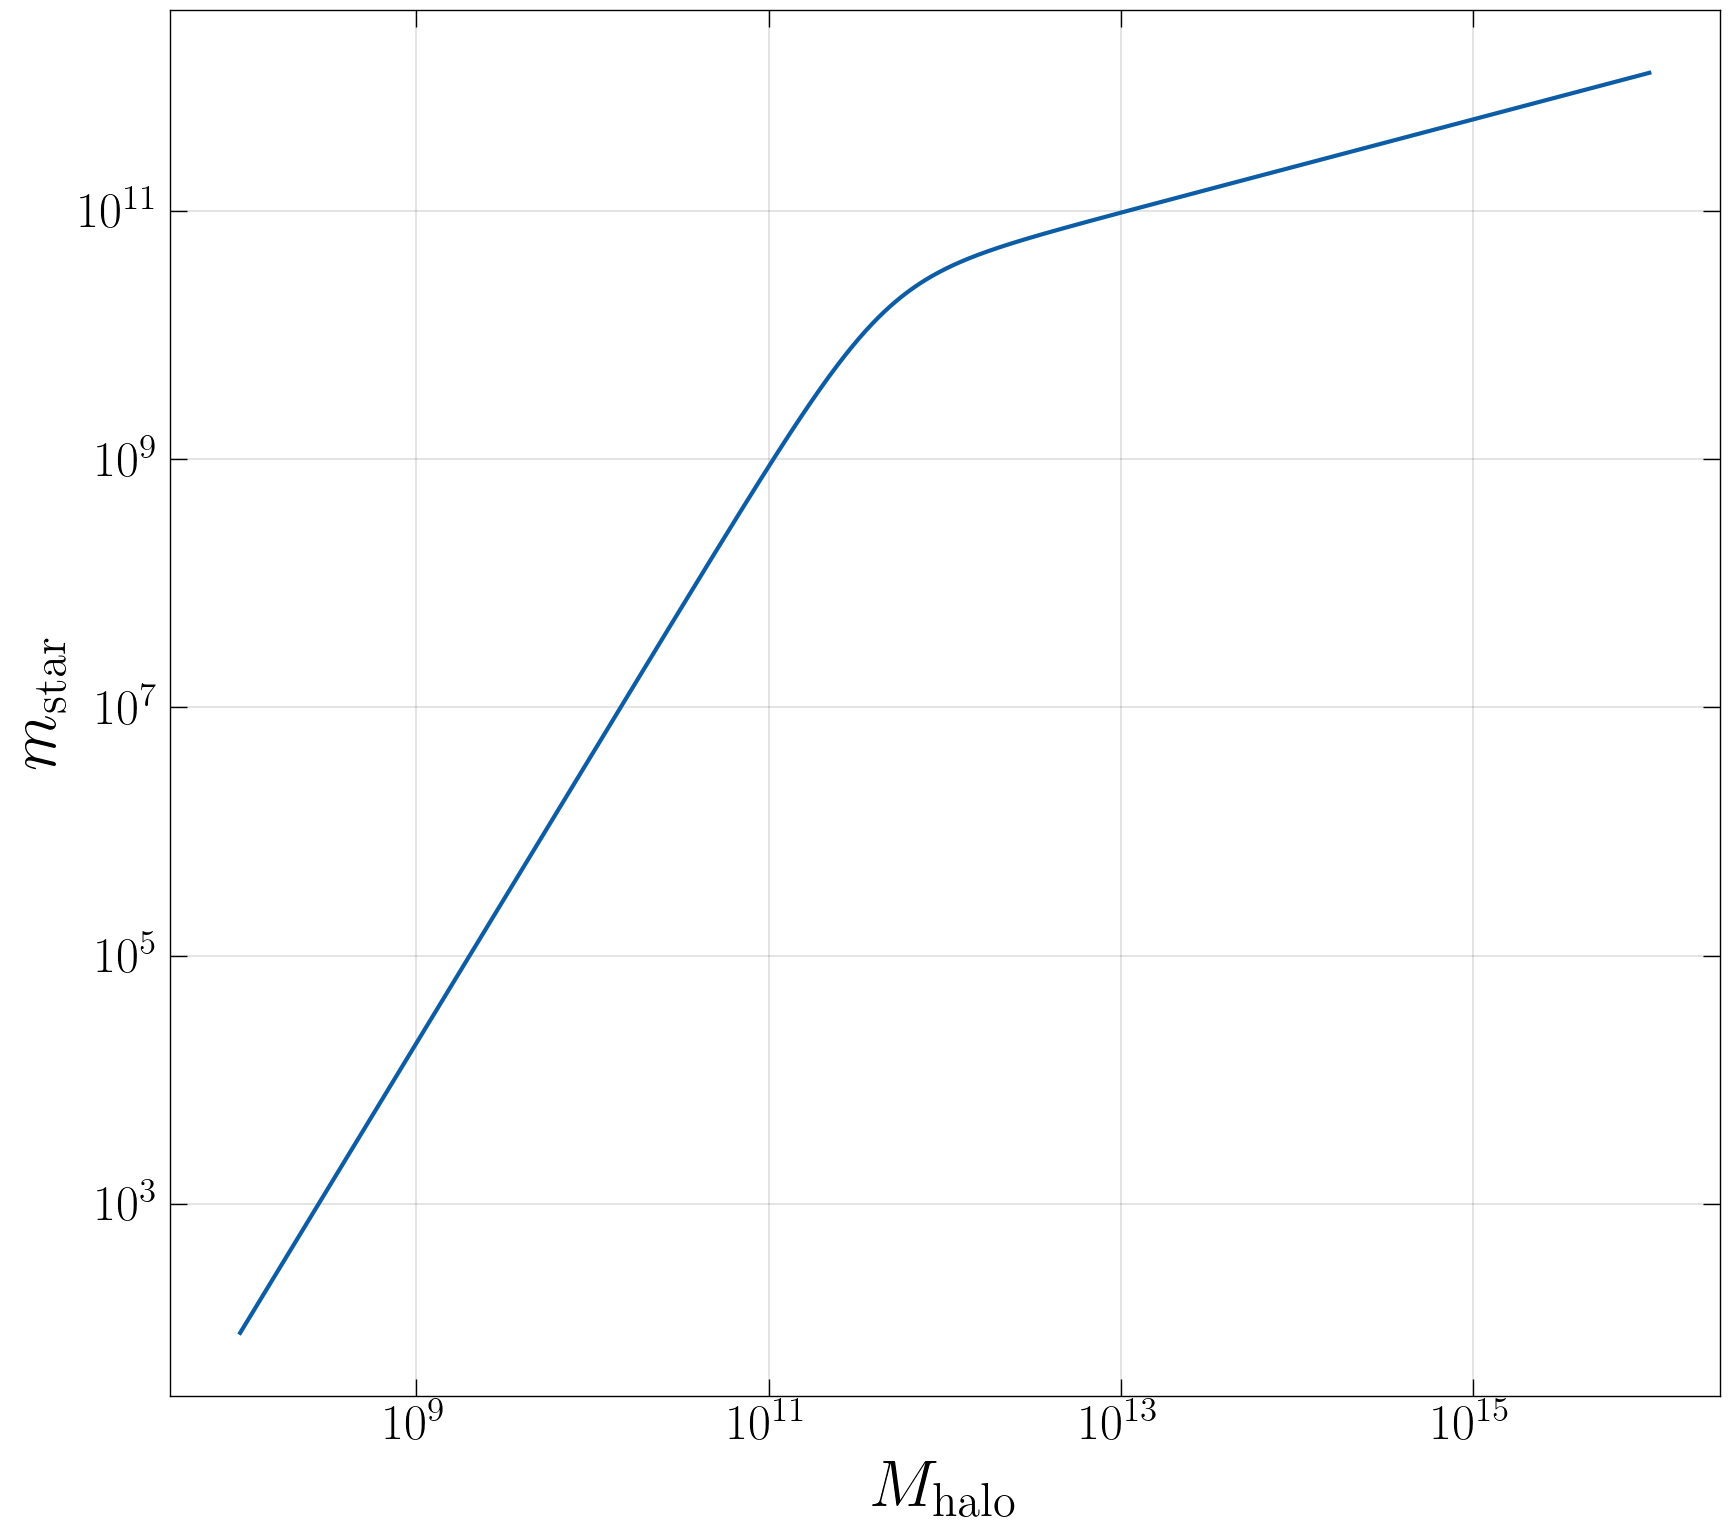

In [23]:
fig, ax = plt.subplots(figsize=(10, 9))

ax.set_xlabel(r'$M_{\text{halo}}$')
ax.set_ylabel(r'$m_{\text{star}}$')

ax.plot(M_grid, m_star)

ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In [24]:
from numpy.polynomial.legendre import Legendre

# The fit with Legendre polynomials has to be done in log units since we are visualizing data in log units
# The reason is that the fit method uses a LEAST SQUARES approach and if we fit in linear units
# the higher powers will be wheighted more than the lower ones in the fit, leading to underfit of the data
# for low masses.
# Then to evaluate one have to pass log units to the __call__() method and exponetiate the result
leg = Legendre.fit(np.log10(m_star), np.log10(M_grid), deg=1000)
leg.domain

c:\Users\Marco\anaconda3\envs\Astrostatistics\lib\site-packages\numpy\polynomial\legendre.py:1417: RankWarning: The fit may be poorly conditioned
  return pu._fit(legvander, x, y, deg, rcond, full, w)


array([ 1.96062972, 12.11320601])

In [25]:
m_halo_min = 1e9
m_halo_max = 10**11.6
m_star_min, m_star_max = m_star_m_halo(np.array([m_halo_min, m_halo_max]), z=z_mean)
print(10, '^', np.log10(m_star_min))
print(10, '^', np.log10(m_star_max))

10 ^ 4.294451493537935
10 ^ 10.108461752206352


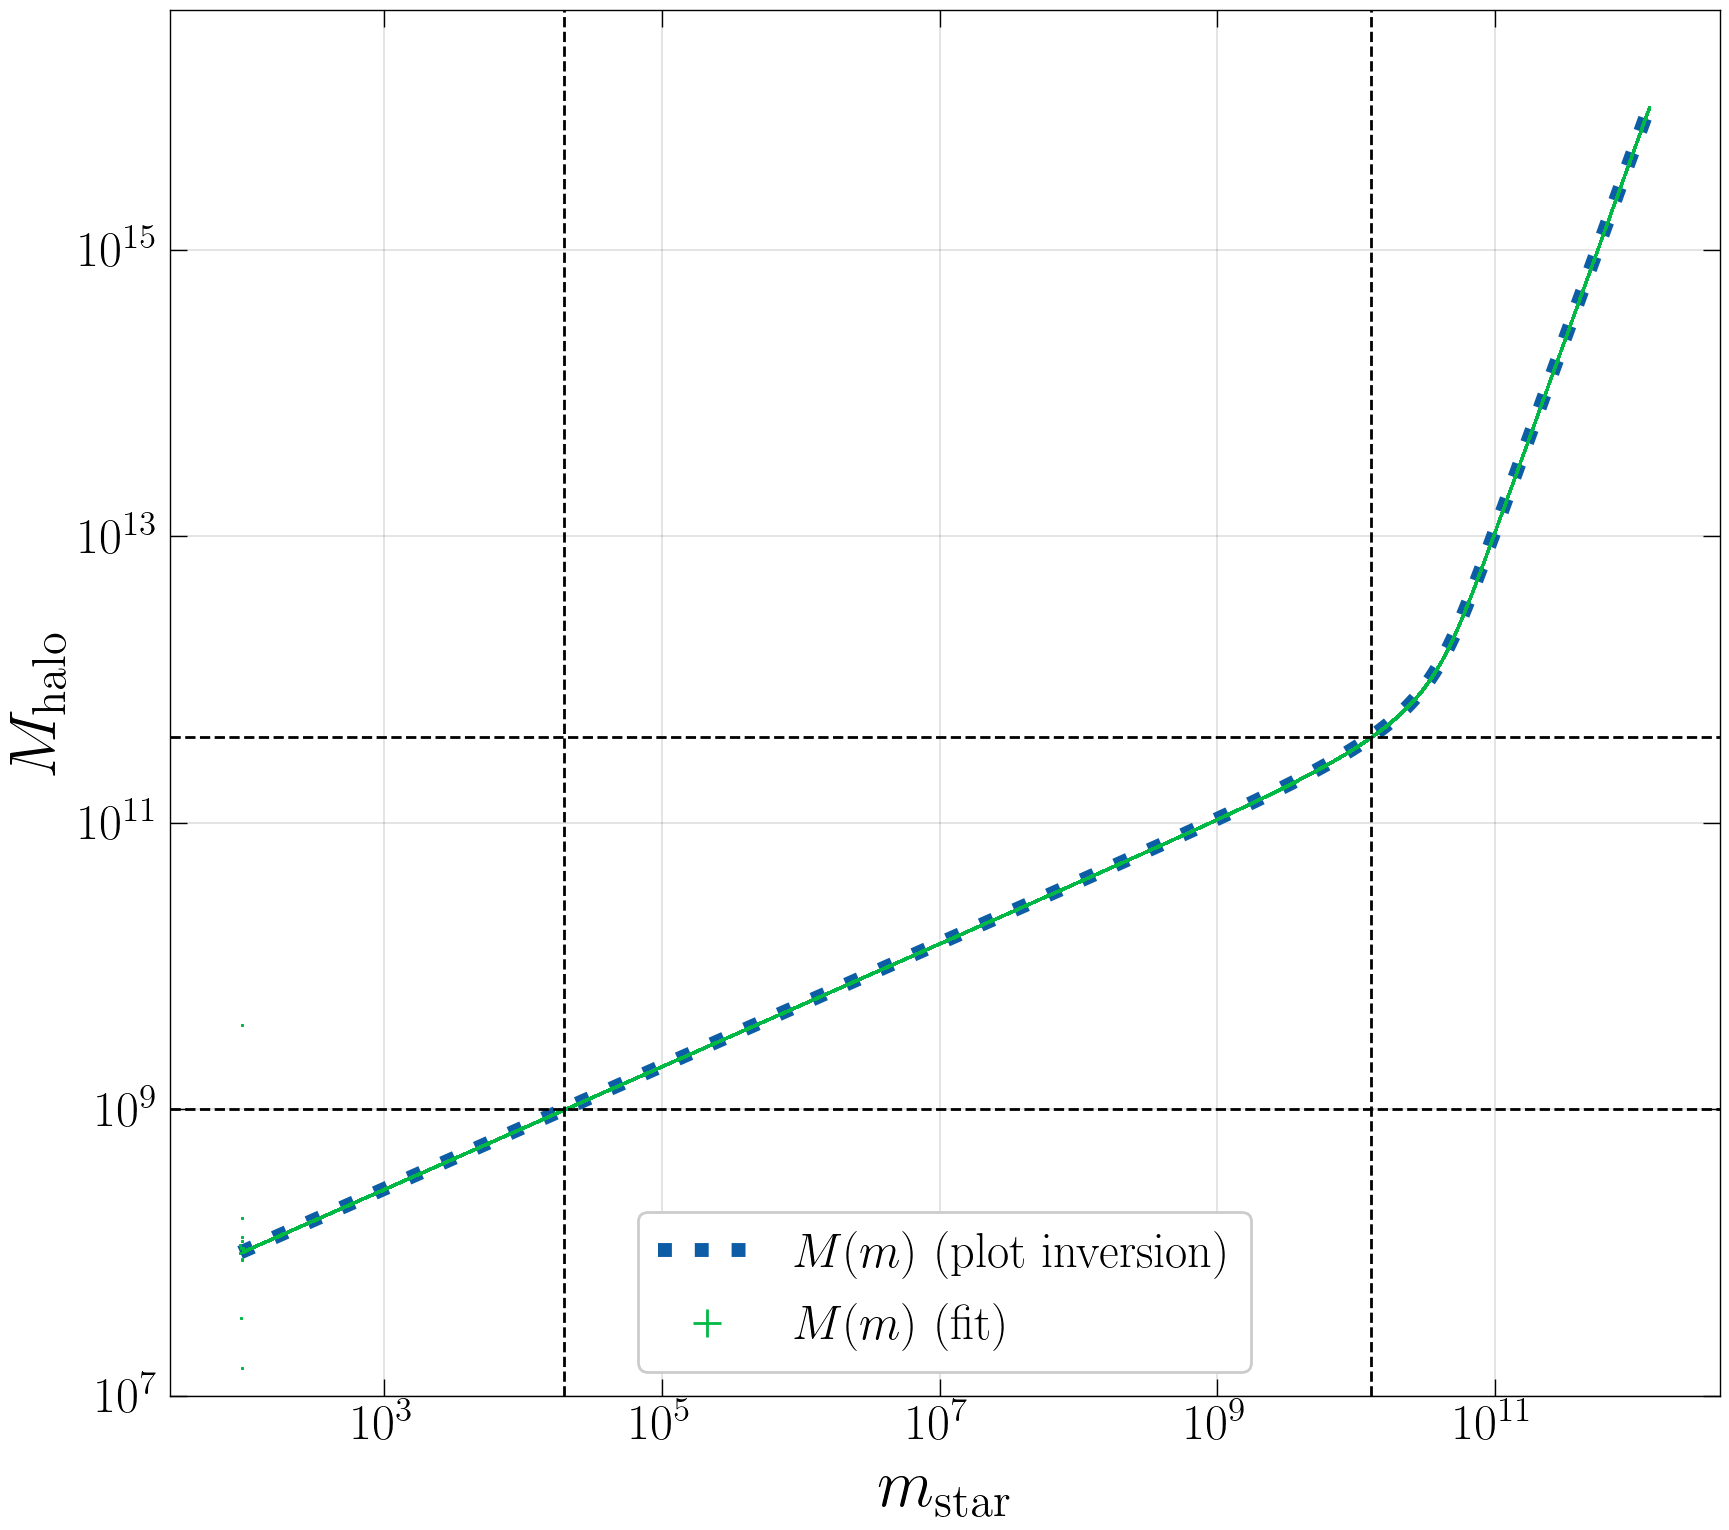

In [26]:
fig, ax = plt.subplots(figsize=(10, 9))

# Original curve
ax.plot(m_star, M_grid, linewidth=5, label=r'$M(m)$ (plot inversion)', ls=':')

ax.set_xlabel(r'$m_{\text{star}}$')
ax.set_ylabel(r'$M_{\text{halo}}$')

# Inverse fit
x_grid = np.logspace(leg.domain[0], leg.domain[1], 10000)
y_grid = 10 ** leg.__call__(np.log10(x_grid))
ax.plot(x_grid, y_grid, ls='', marker='+', markersize=1, label=r'$M(m)$ (fit)')
ax.axhline(m_halo_min, ls='--', lw=1, c='black')
ax.axhline(m_halo_max, ls='--', lw=1, c='black')
ax.axvline(m_star_min, ls='--', lw=1, c='black')
ax.axvline(m_star_max, ls='--', lw=1, c='black')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e7)

ax.legend(markerscale=10);

In [27]:
def m_dot_in(M, z):
    M_0 = 10**12
    Omega_m = 0.3
    Omega_L = 1 - Omega_m
    
    return 42 * ((M / M_0) ** (1.127)) * (1 + 1.17 * z) * np.sqrt(Omega_m * (1 + z) ** 3 + Omega_L)

def sSFR_openbox_eq(m_star, fb, eta, R, z):
    return fb * m_dot_in(10 ** leg.__call__(np.log10(m_star)), z) / (1+eta-R) / m_star

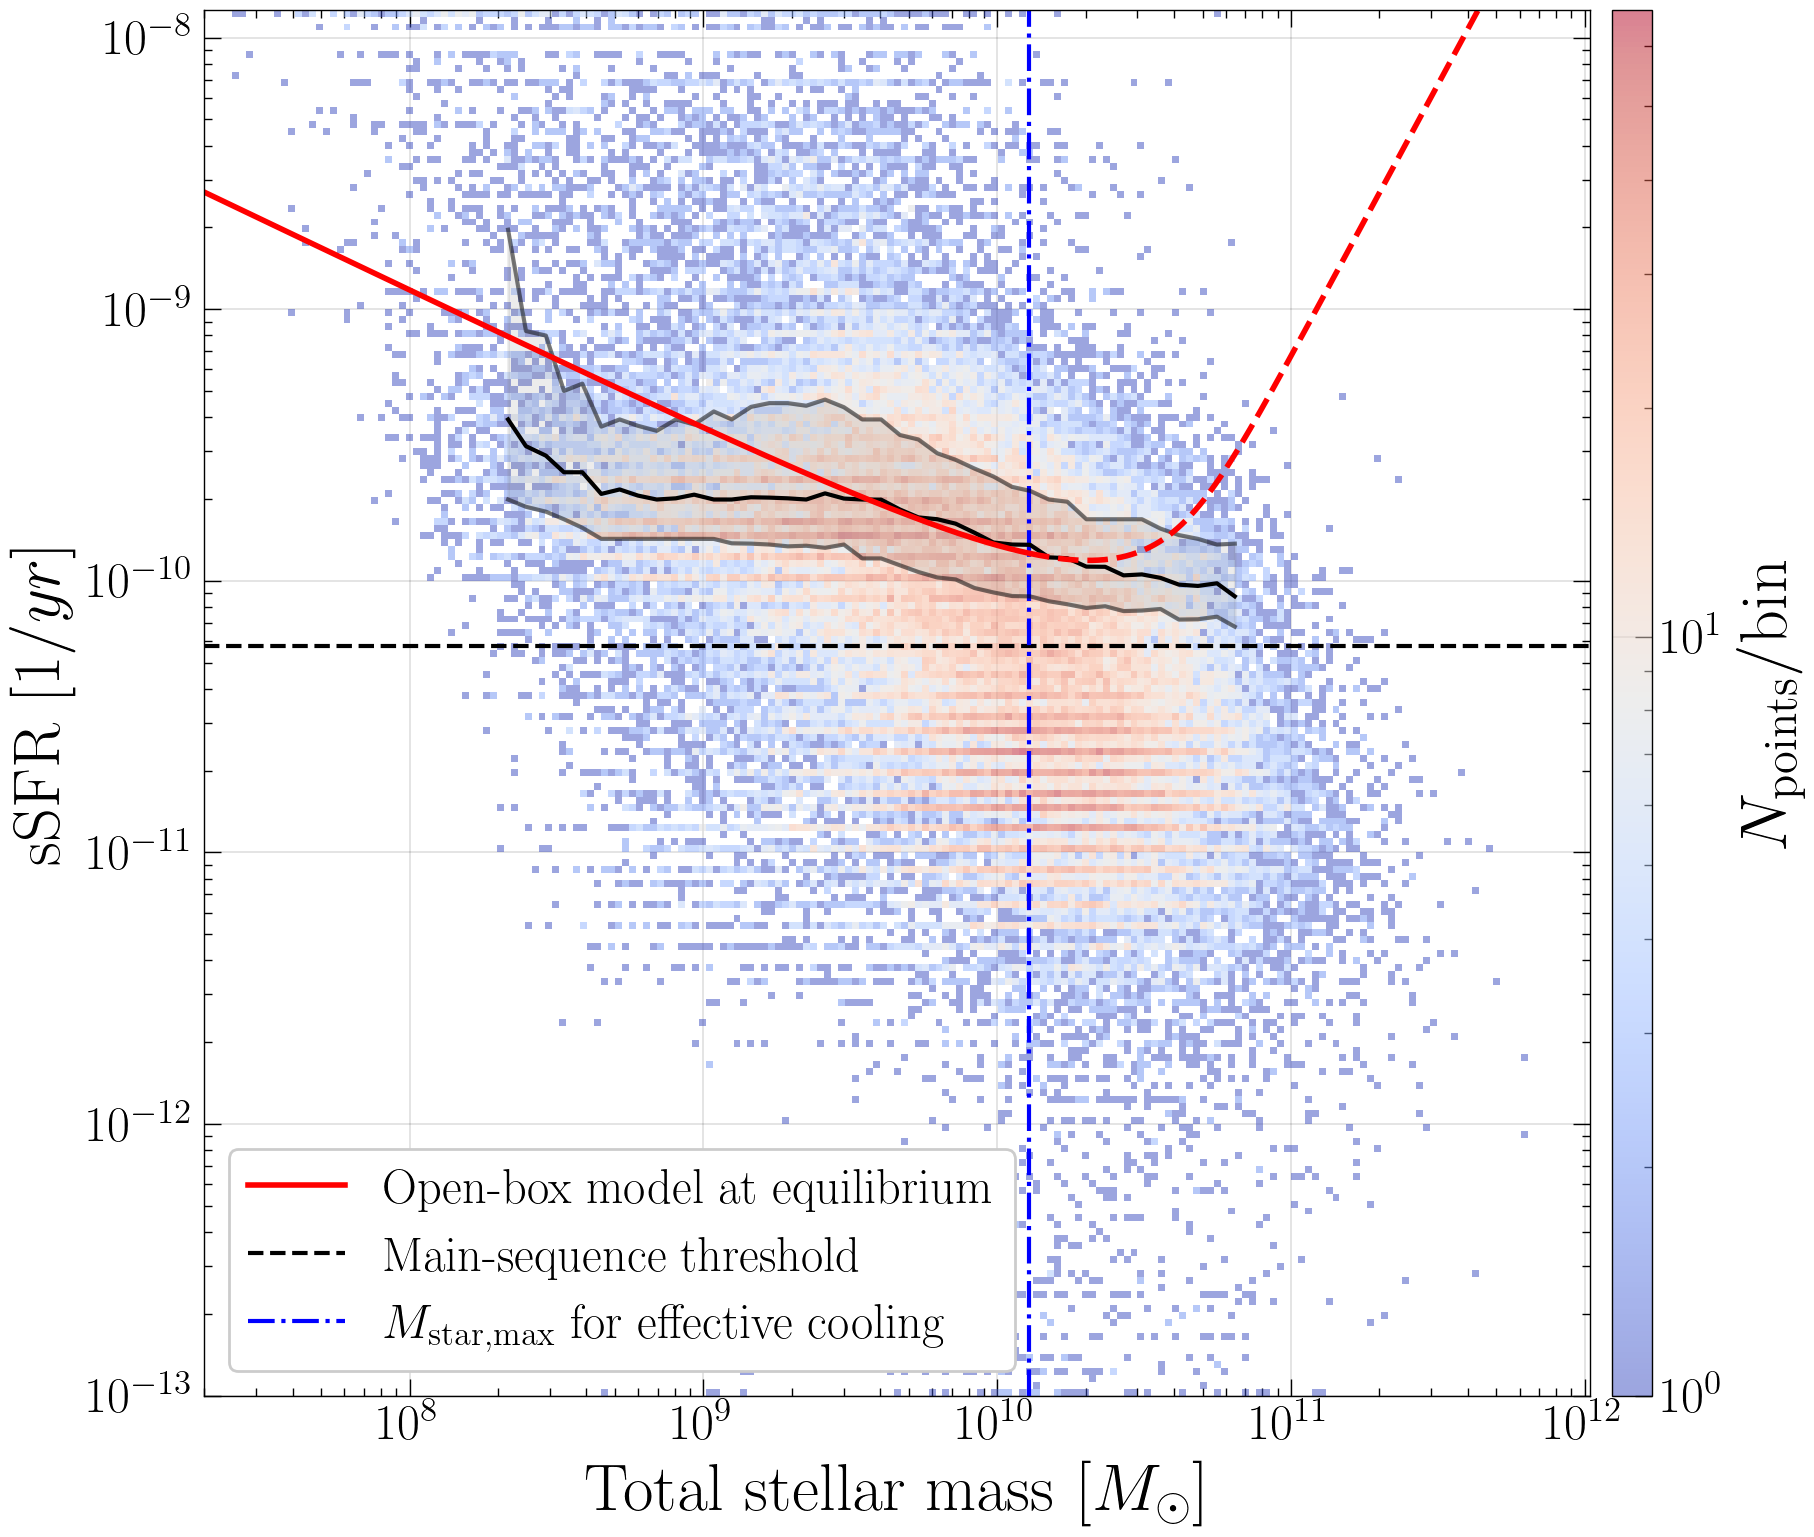

In [28]:
x_data = results['best.stellar.m_star']
y_data = results['best.sfh.sfr10Myrs']/results['best.stellar.m_star']
    
fig, ax, statistics, hist = Plot(x_data, y_data, 'Total stellar mass $[M_\odot]$', 'sSFR $[1/yr]$', MS_mask,
                                 x_min=2e7, y_min=1e-13, x_min_bins=2e8, x_max_bins=7e10)

x_data = np.sort(np.array(results['best.stellar.m_star']))
x_plot = x_data[np.logical_and((m_star_min<=x_data), (x_data<=m_star_max))]
sSFRvsmass = sSFR_openbox_eq(x_plot, fb=0.15, eta=0.9, R=0.4, z=z_mean)
ax.plot(x_plot, sSFRvsmass, lw=2, color='red', zorder=2, label='Open-box model at equilibrium')

x_plot = x_data[x_data>m_star_max]
sSFRvsmass = sSFR_openbox_eq(x_plot, fb=0.15, eta=0.9, R=0.4, z=z_mean)
ax.plot(x_plot, sSFRvsmass, lw=2, ls='--', color='red', zorder=2)

ax.axhline(sSFR_threshold, ls='--', lw=1.5, c='black', zorder=1, label='Main-sequence threshold')
ax.axvline(m_star_max, ls='-.', lw=1.5, c='blue', zorder=1, label='$M_{\\rm star, max}$ for effective cooling')
ax.legend(loc='lower left');

# 4) Open-box: complete model

## 4.1) Step-function $\xi$

In [29]:
import astropy.units as u
from astropy.cosmology import Planck13, z_at_value

In [30]:
# Set global parameters 
dt       = 0.01 #Gyr
eps      = 0.02
eta      = 2
R        = 0.2  # in [0,1]
f_b      = 0.15
M_h_min  = m_halo_min # 10^9
M_h_max  = m_halo_max # 10^11.6
M_h_form = 5.e8 # dark-matter halo mass at t_form

In [31]:
# Set global arrays
t = np.arange(dt, 13.1, dt) #Gyr
z = t*0.
t_dyn = t*0.
for i in range(len(t)):
    z[i] = z_at_value(Planck13.age, t[i] * u.Gyr)
    t_dyn[i] = 2.e7*(1+z[i])**(-0.75) #yr

In [32]:
def evolve_galaxy_stepxi(t_form, t_obs, M_h_in):
    # Initialize arrays
    M_h = t*0.
    M_g = t*0.
    M_s = t*0.
    SFR = t*0.
    
    # Cycle
    for i in range(len(t)):
        if t[i] < t_form:
            M_h[i] = M_h_in
        elif t[i] < t_obs:
            M_dot_h = 42.0 * ((M_h[i-1]/1.e12)**1.127) * (1+1.17*z[i]) * (0.3*(1+z[i])**3+0.7)**0.5 #M_sun/yr
            M_h[i] = M_h[i-1] + M_dot_h*dt*1.e9 #Gyr -> yr
            if M_h[i]< M_h_min:
                csi=0.0
            elif M_h[i]> M_h_min and M_h[i]< M_h_max:
                csi=1.0
            else:
                csi=0.0 
                #csi = (M_h_max/M_h[i])
            #eta = (M_h[i]/M_h_max)**(1/3)
            M_g[i]= M_g[i-1] + dt*1.e9*(f_b*csi*M_dot_h - M_g[i-1]*(1+eta-R)*eps/t_dyn[i])
            SFR[i] = M_g[i] * eps/t_dyn[i]
            M_s[i] = M_s[i-1] + (1-R)*SFR[i]*dt*1.e9
        else:
            M_h[i] = M_h[i-1]
            M_g[i] = M_g[i-1]
            M_s[i] = M_s[i-1]
            SFR[i] = SFR[i-1]
        
    return M_h, M_g, M_s, SFR

### 4.1.1) Simulation

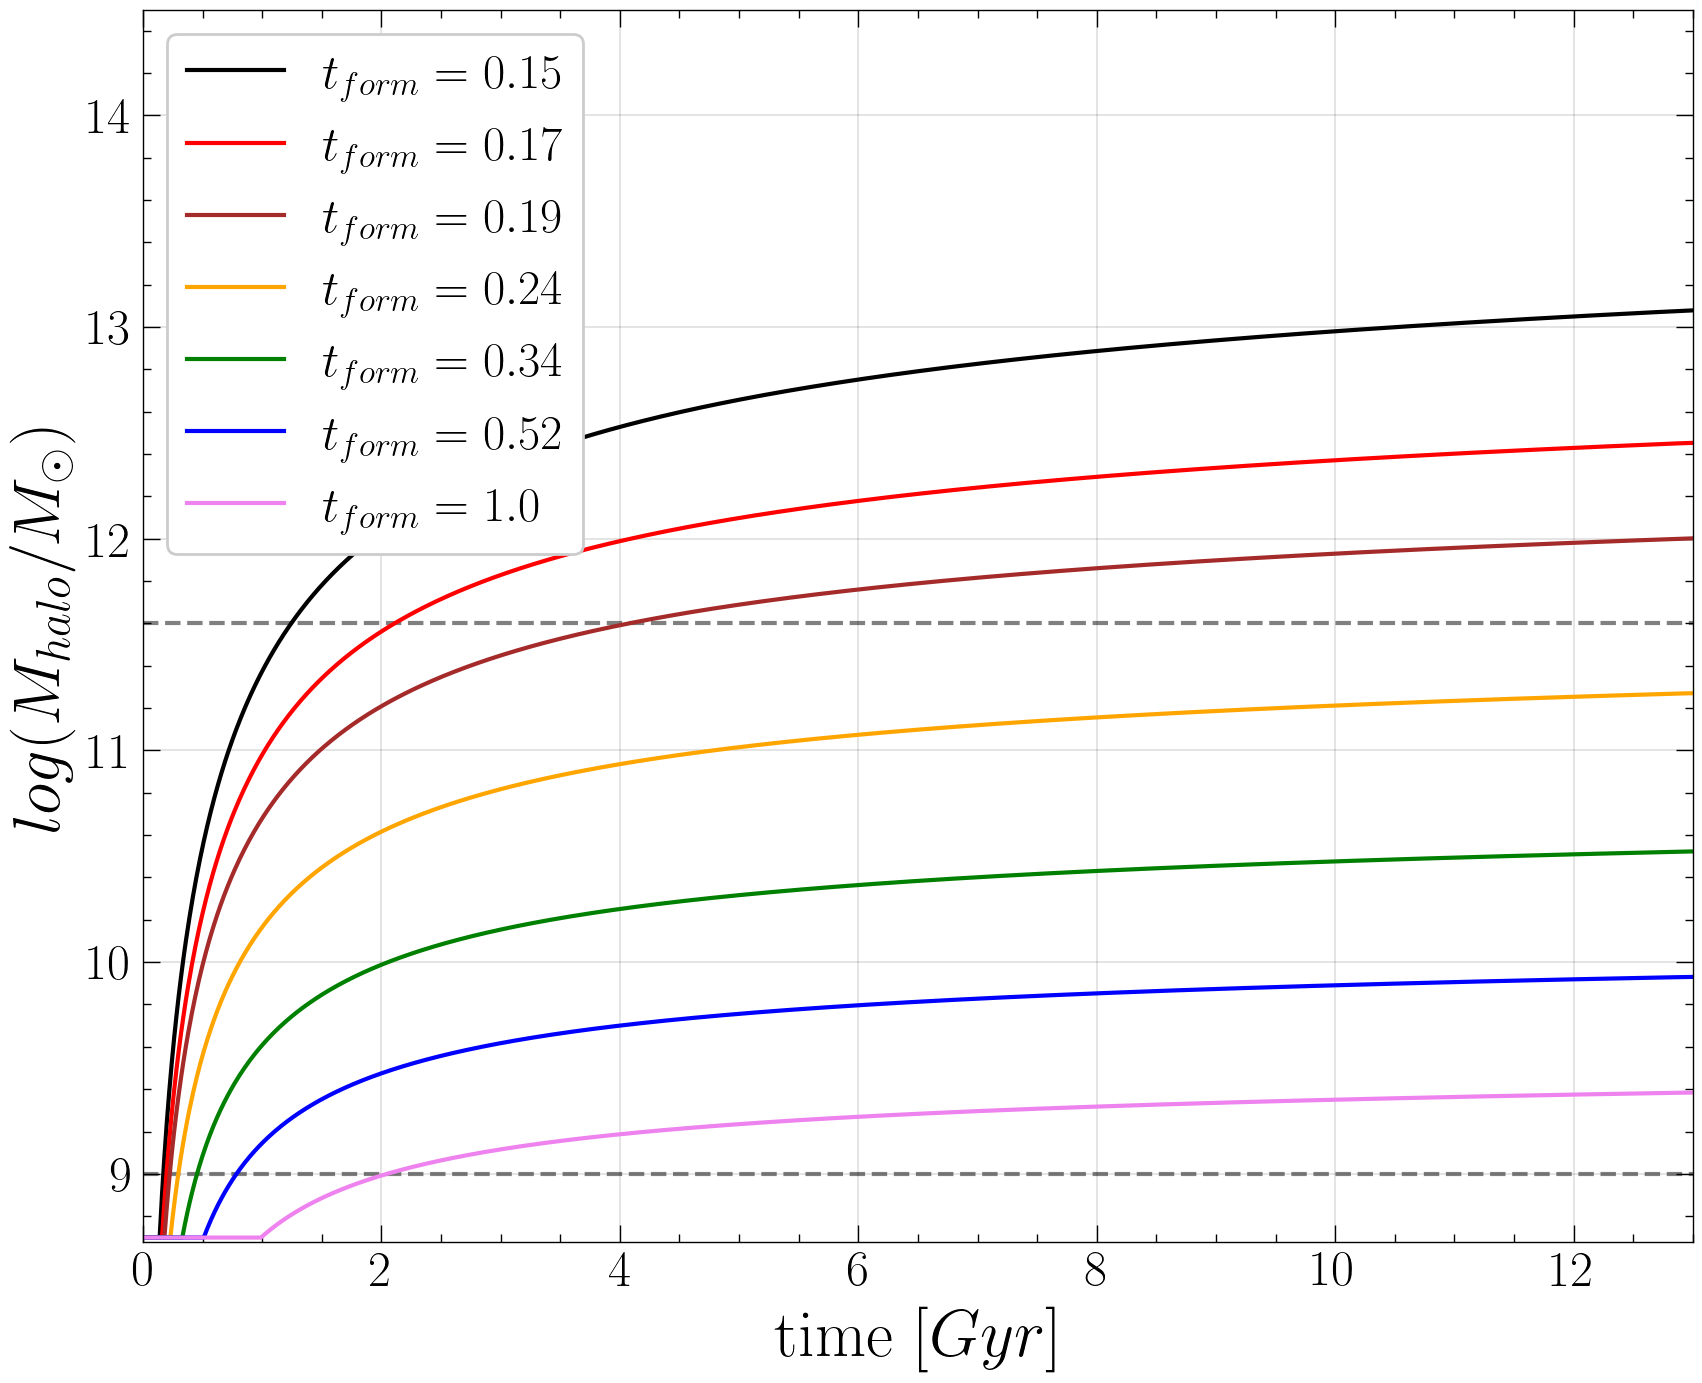

In [33]:
t_form_plot = [0.15, 0.17, 0.19, 0.24, 0.34, 0.52, 1.00]
col_plot= ['black', 'red', 'brown', 'orange', 'green', 'blue', 'violet']

# Plot M_h, time evolution
for i in range(len(t_form_plot)):
    M_h, M_g, M_s, SFR = evolve_galaxy_stepxi(t_form=t_form_plot[i], t_obs=13, M_h_in=M_h_form)
    plt.plot(t, np.log10(np.where(M_h>0, M_h, 1.0)), color=col_plot[i], label=f'$t_{{form}}={t_form_plot[i]}$')
    
plt.axhline(y=np.log10(M_h_min), color='grey', linestyle='--', zorder=0)
plt.axhline(y=np.log10(M_h_max), color='grey', linestyle='--', zorder=0)
plt.xlim(0, 13)
plt.ylim(8.68, 14.5)
plt.xlabel('time $[Gyr]$')
plt.ylabel('$log(M_{halo}/M_\\odot)$')
plt.legend();

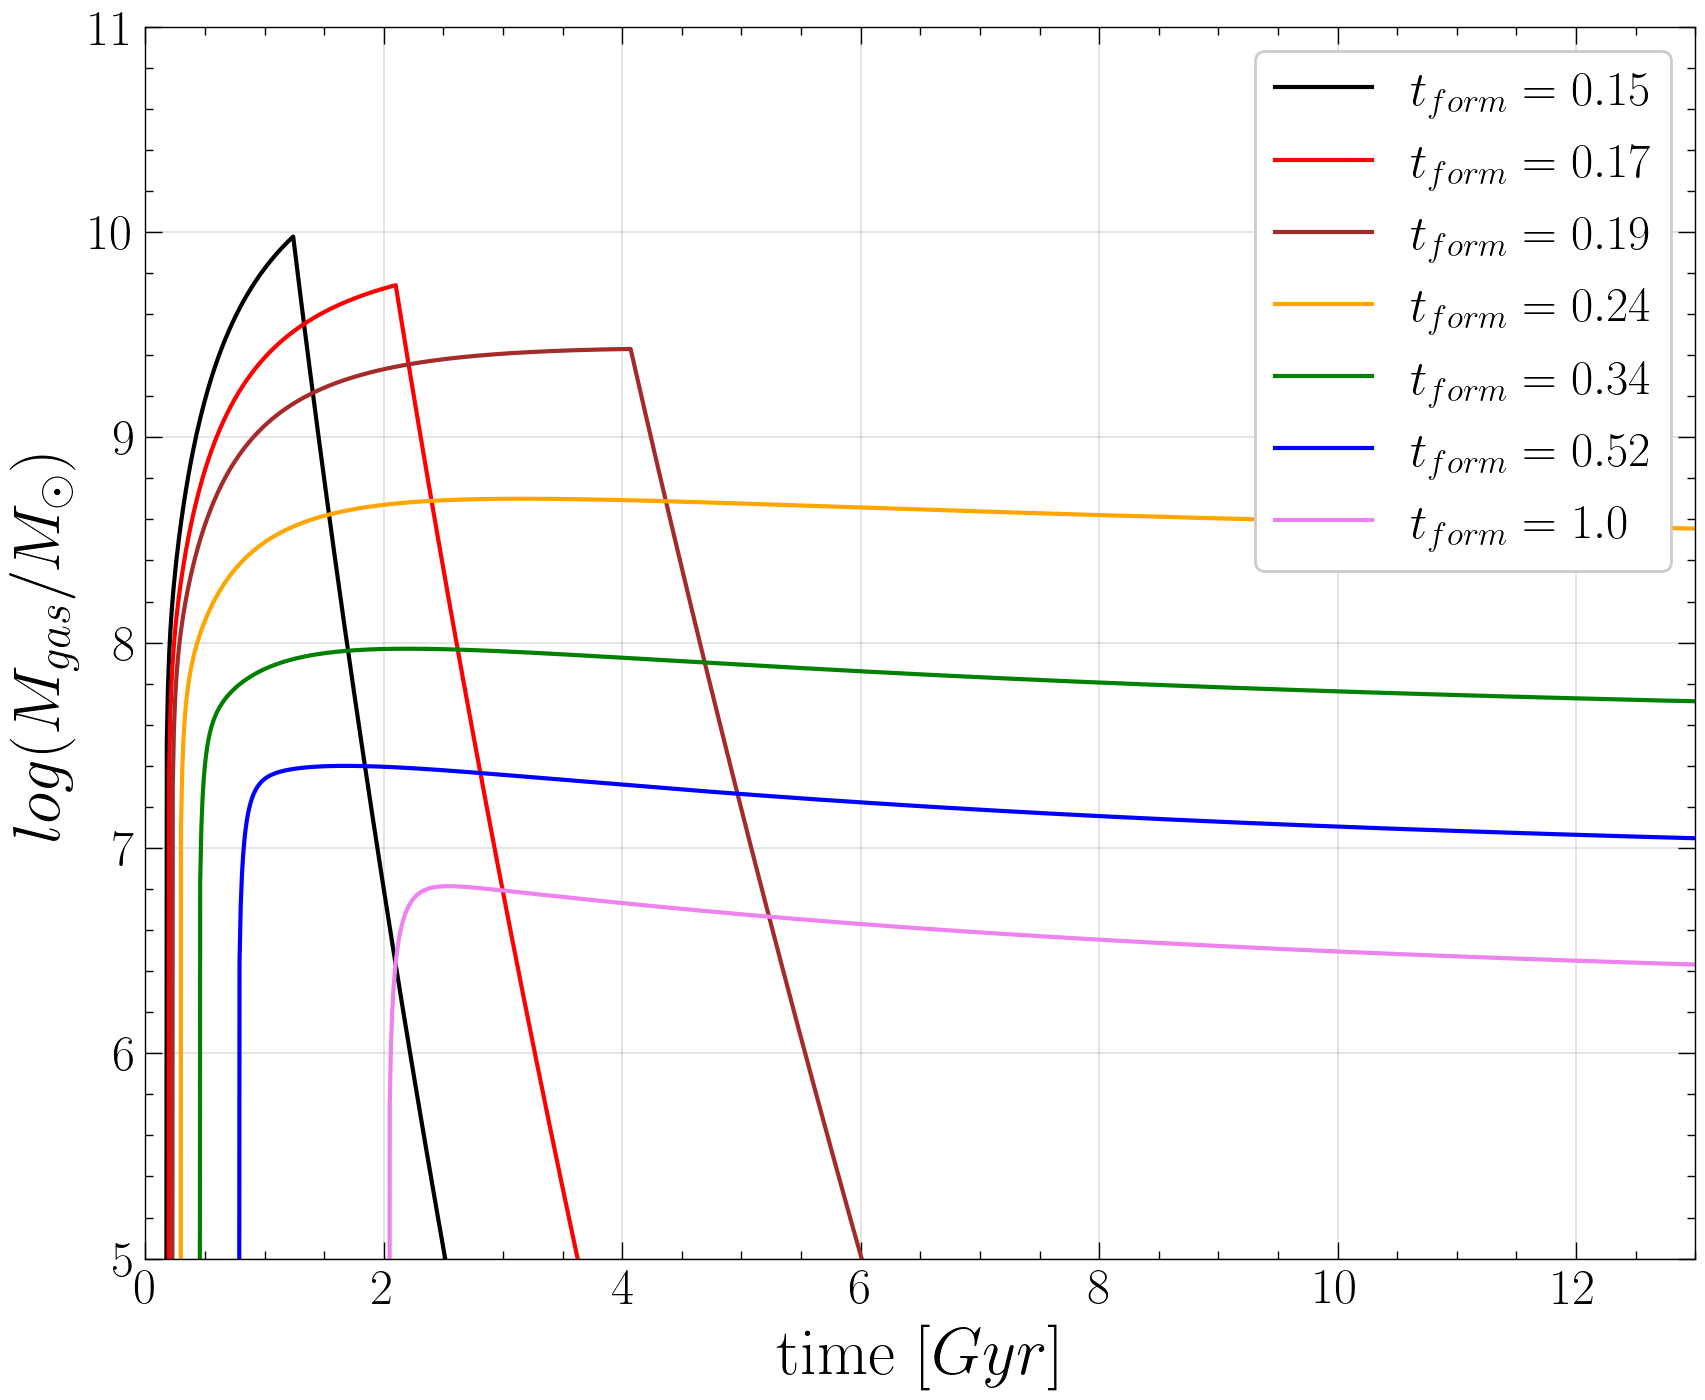

In [34]:
# Plot M_g, time evolution 
for i in range(len(t_form_plot)):
    M_h, M_g, M_s, SFR = evolve_galaxy_stepxi(t_form=t_form_plot[i], t_obs=13, M_h_in=M_h_form)
    plt.plot(t, np.log10(np.where(M_g>0, M_g, 1.0)), color=col_plot[i], label=f'$t_{{form}}={t_form_plot[i]}$')

plt.xlim(0, 13)
plt.ylim(5, 11)
plt.xlabel('time $[Gyr]$')
plt.ylabel('$log(M_{gas}/M_\\odot)$')
plt.legend();

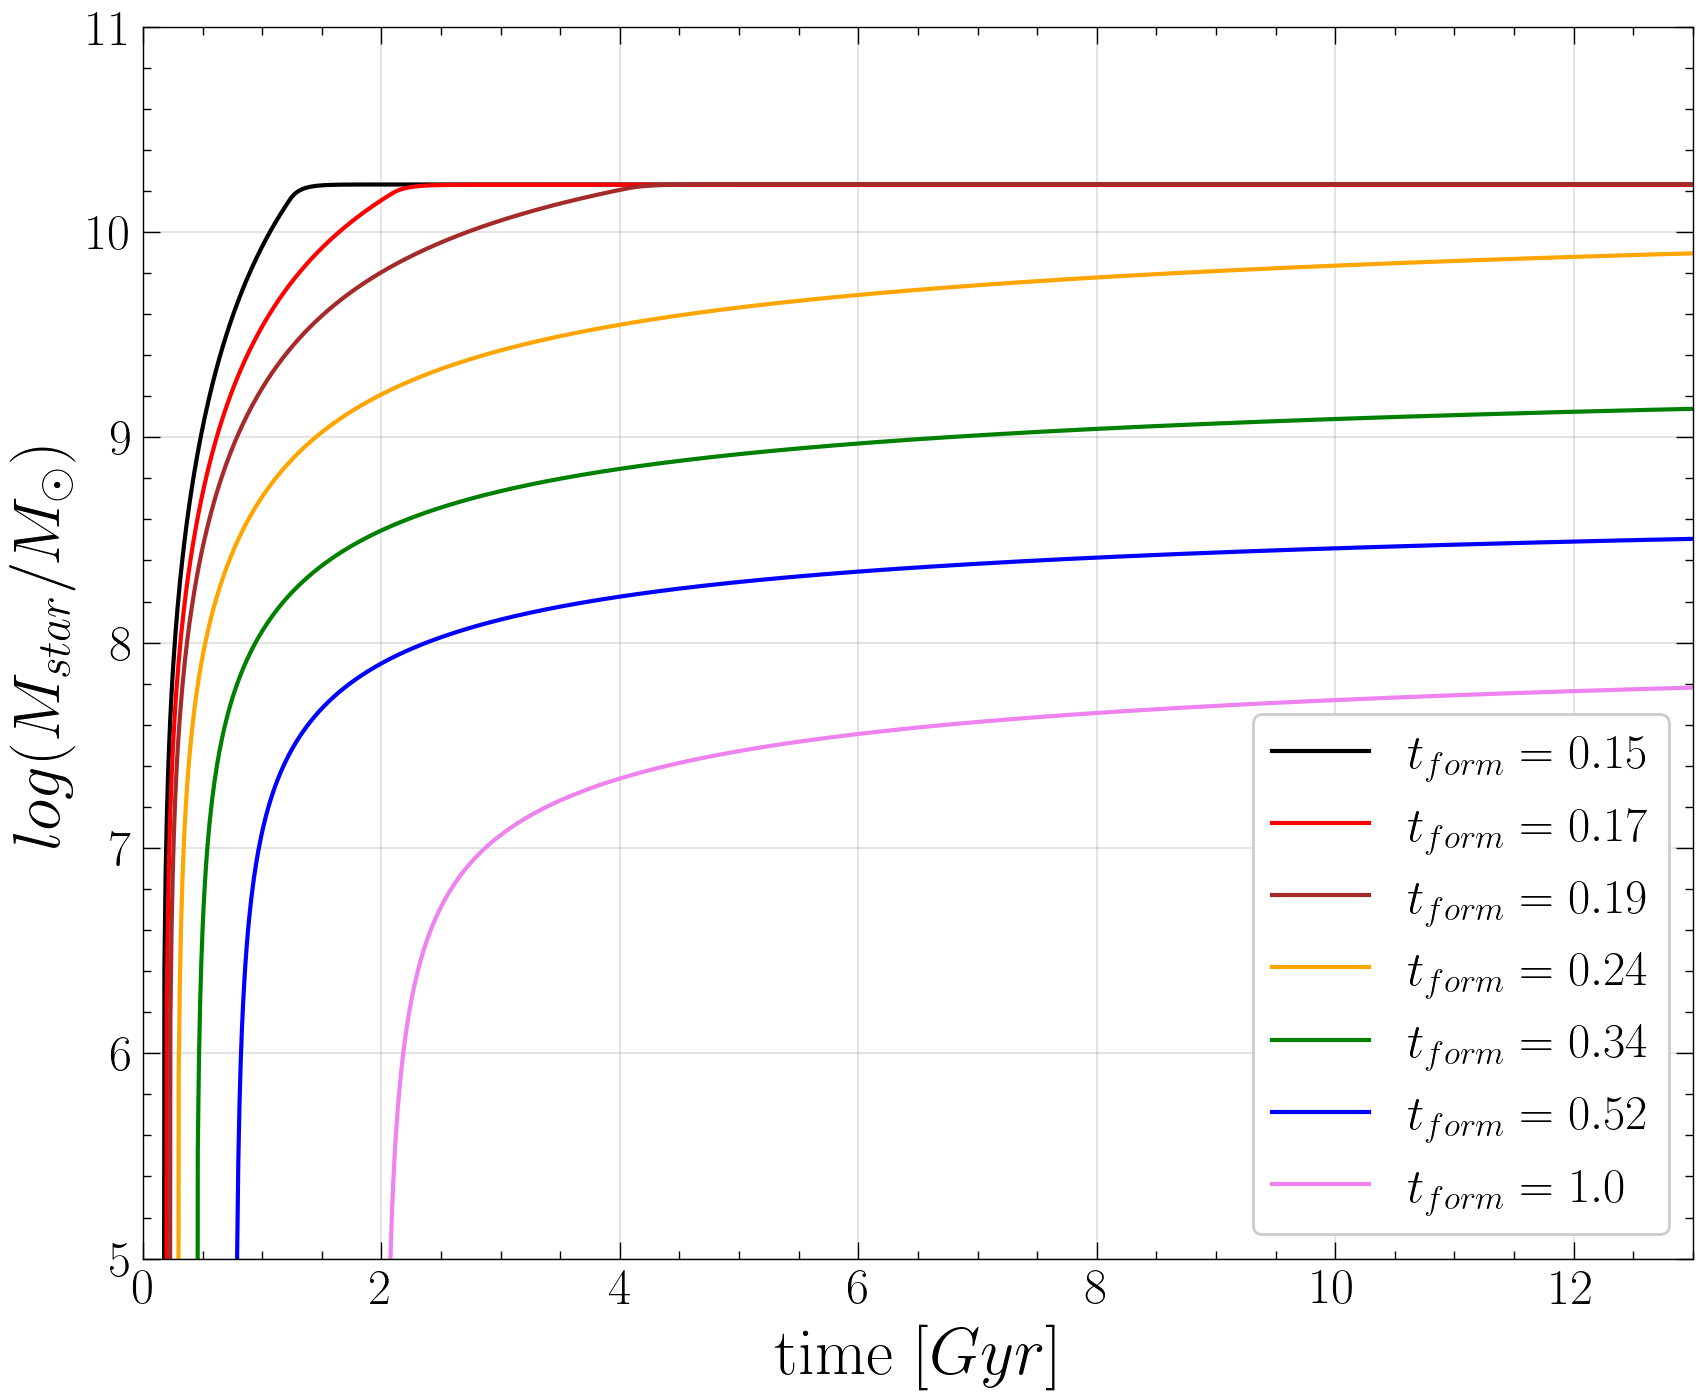

In [35]:
# Plot M_s, time evolution 
for i in range(len(t_form_plot)):
    M_h, M_g, M_s, SFR = evolve_galaxy_stepxi(t_form=t_form_plot[i], t_obs=13, M_h_in=M_h_form)
    plt.plot(t, np.log10(np.where(M_s>0, M_s, 1.0)), color=col_plot[i], label=f'$t_{{form}}={t_form_plot[i]}$')

plt.xlim(0, 13)
plt.ylim(5, 11)
plt.xlabel('time $[Gyr]$')
plt.ylabel('$log(M_{star}/M_\\odot)$')
plt.legend();

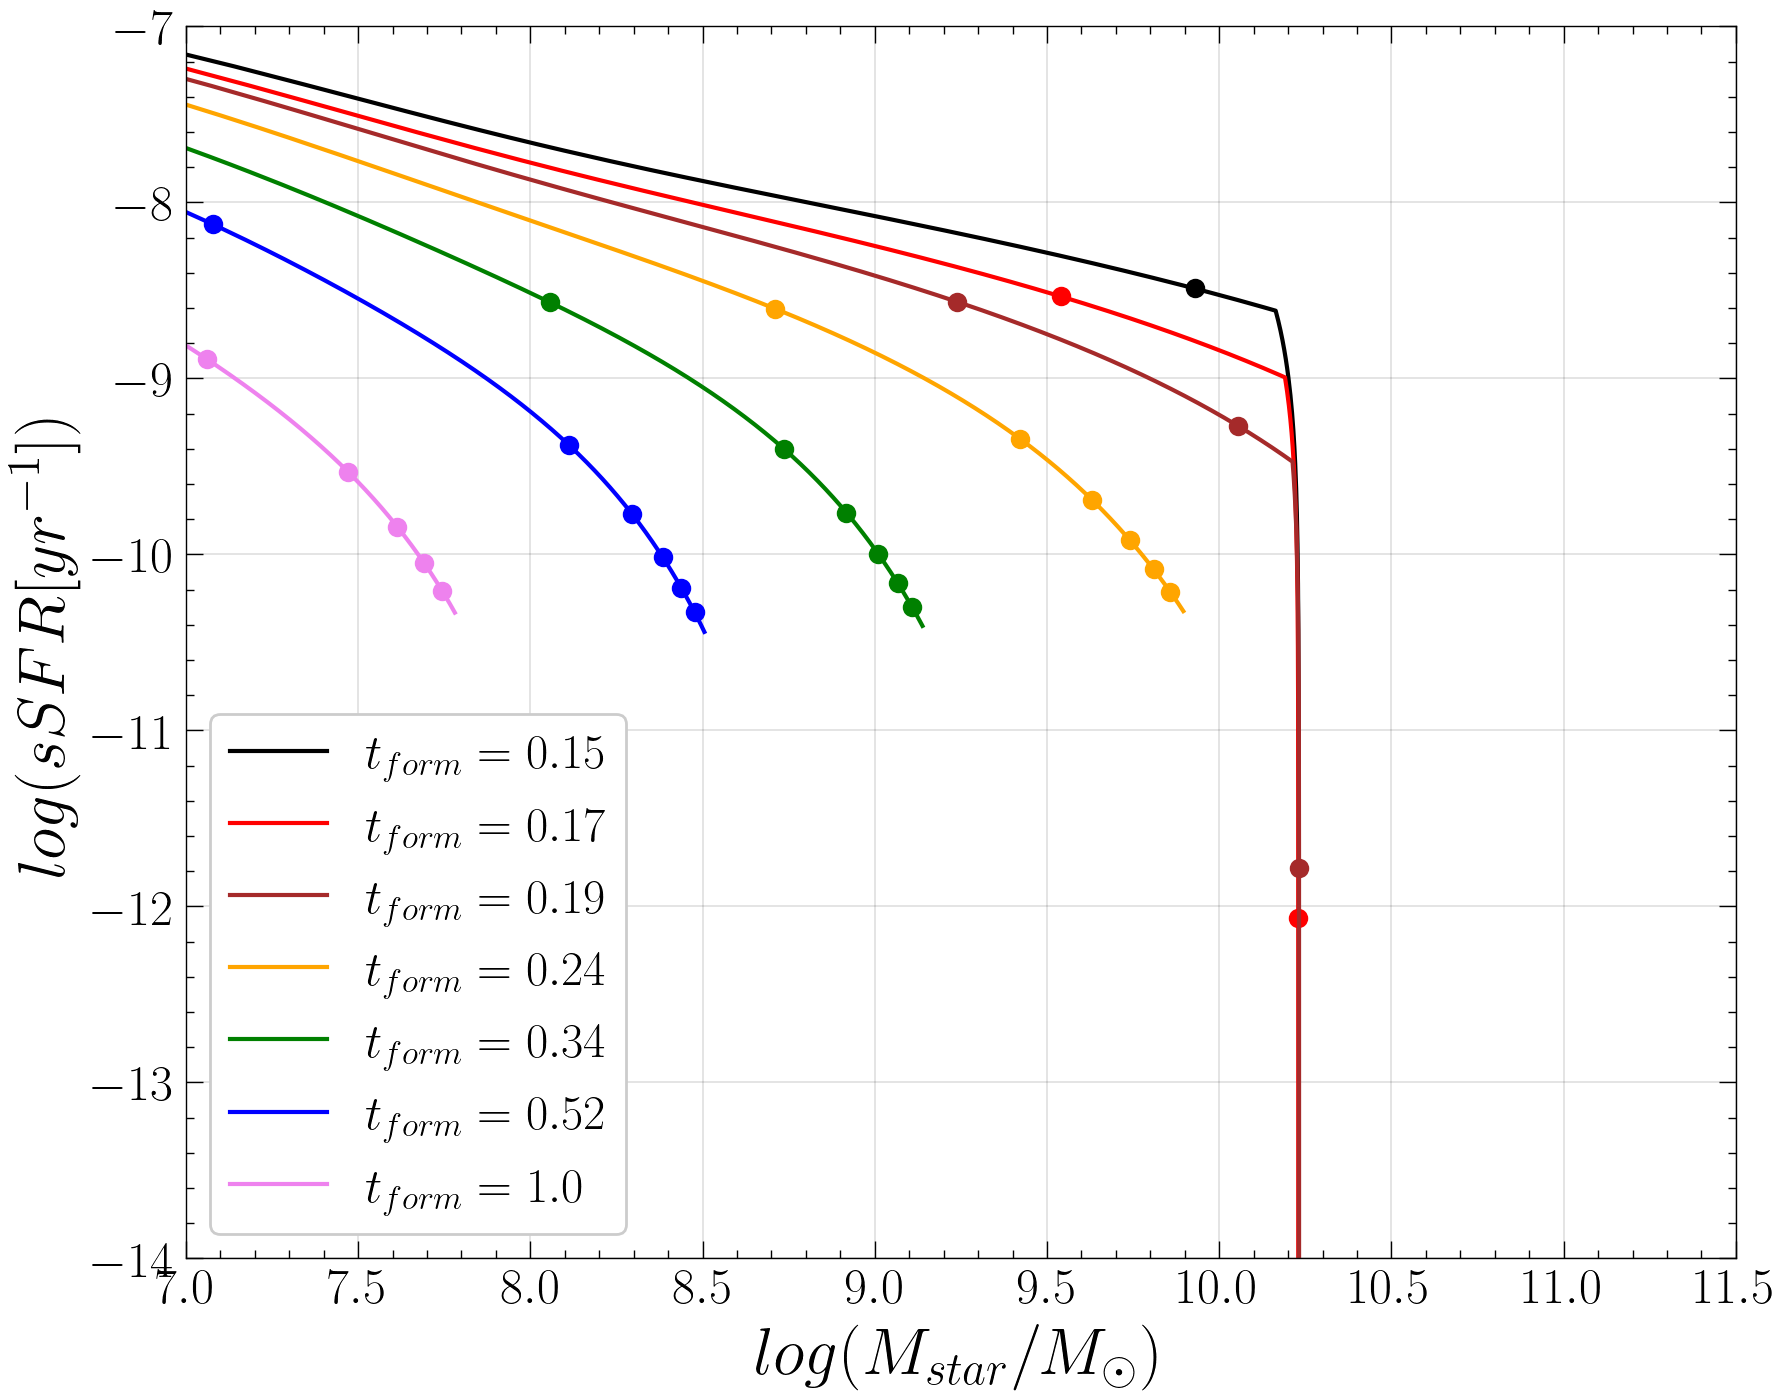

In [36]:
# Plot sSFR
for i in range(len(t_form_plot)):
    M_h, M_g, M_s, SFR = evolve_galaxy_stepxi(t_form=t_form_plot[i], t_obs=13, M_h_in=M_h_form)
    t_mark = np.arange(1., 13., 2.)
    M_s_ = np.where(M_s>0, M_s, 1.0)
    SFR_ = np.where(SFR>0, SFR, 1e-10)
    sSFR= SFR_/M_s_
    plt.plot(np.log10(M_s_), np.log10(sSFR), color=col_plot[i], label=f'$t_{{form}}={t_form_plot[i]}$')
    for tt in t_mark:
        plt.plot(np.log10(M_s_[t==tt]), np.log10(sSFR[t==tt]), color=col_plot[i], marker='o')

plt.xlim(7,11.5)
plt.ylim(-14, -7)
plt.xlabel('$log(M_{star}/M_\\odot)$') 
plt.ylabel('$log(sSFR[yr^{-1}])$')
plt.legend();

### 4.1.2) Applying the code to the data

In [37]:
z_mean

0.053807276843311734

In [38]:
time_z_mean = Planck13.lookback_time(10000).value - Planck13.lookback_time(z_mean).value
print(time_z_mean, 'Gyrs')

13.049544199004435 Gyrs


In [39]:
def plot_sSFR(evolve_galaxy, t_mark, t_form, M_h_form):
    M_s_array = []
    sSFR_array = []
    
    for i in range(len(t_form)):
        M_h, M_g, M_s, SFR = evolve_galaxy(t_form=t_form[i], t_obs=t_mark, M_h_in=M_h_form)
        M_s_ = np.where(M_s>0, M_s, 1.0)
        SFR_ = np.where(SFR>0, SFR, 1e-10)
        sSFR_ = SFR_/M_s_
        t_plot = np.isclose(t, t_mark, rtol=1e-4)
        M_s_array.append(M_s_[t_plot])
        sSFR_array.append(sSFR_[t_plot])
    M_s_array = np.array(M_s_array)
    sSFR_array = np.array(sSFR_array)
    
    return M_s_array, sSFR_array

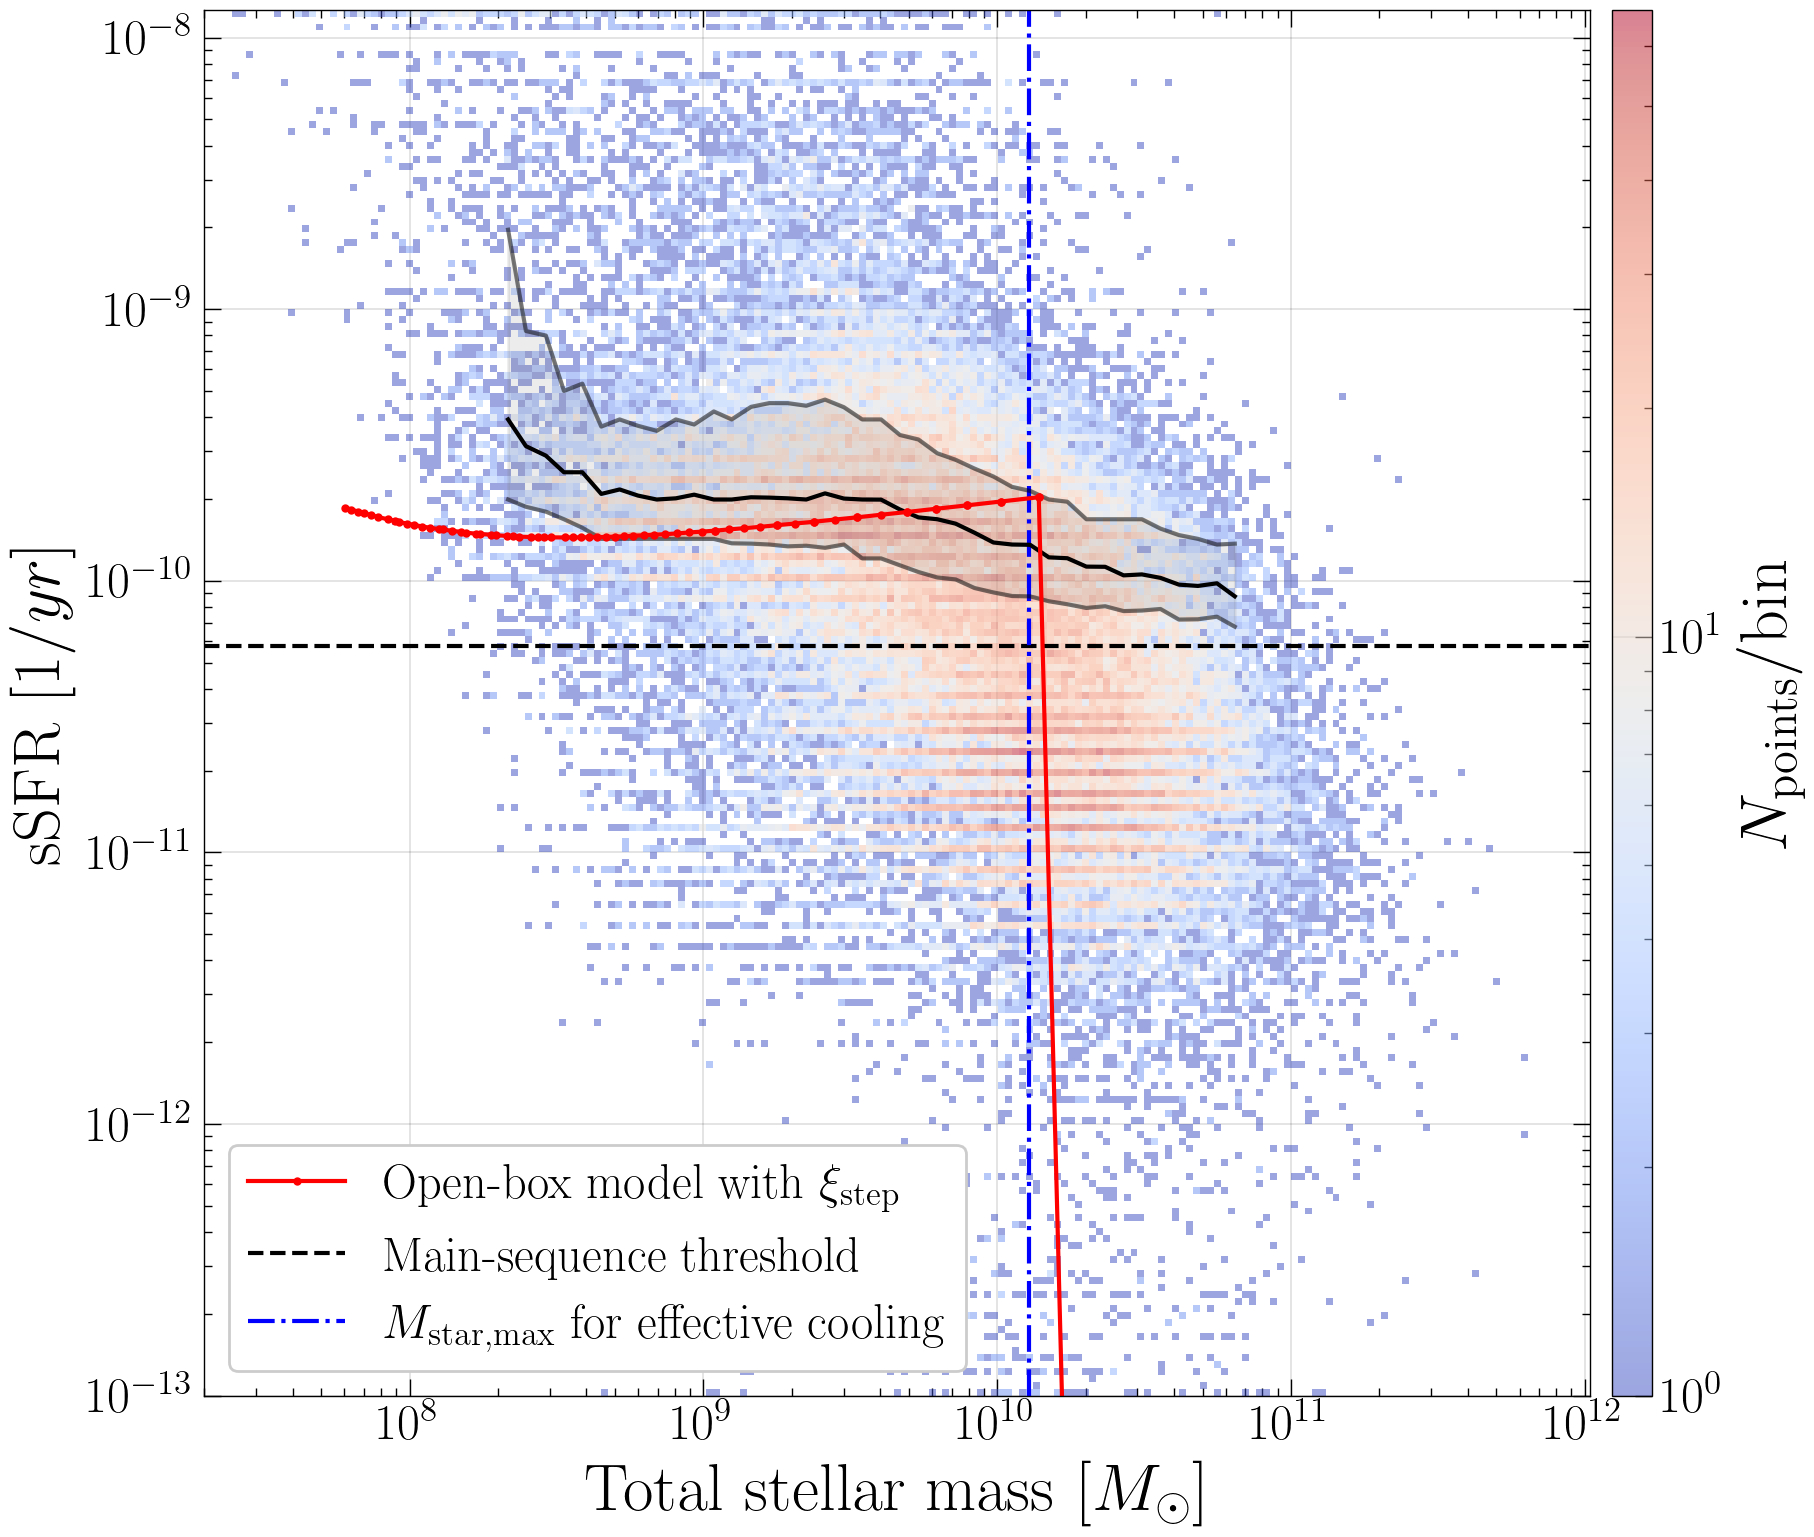

In [40]:
x_data = results['best.stellar.m_star']
y_data = results['best.sfh.sfr10Myrs']/results['best.stellar.m_star']

t_form = np.logspace(np.log10(0.1), np.log10(1), 100)
    
fig, ax, statistics, hist = Plot(x_data, y_data, 'Total stellar mass $[M_\odot]$', 'sSFR $[1/yr]$', MS_mask, 
                                 x_min=2e7, y_min=1e-13, x_min_bins=2e8, x_max_bins=7e10)

M_s_array, sSFR_array = plot_sSFR(evolve_galaxy_stepxi, time_z_mean, t_form, M_h_form)
ax.plot(M_s_array, 4*sSFR_array, marker='.', markersize=4, color='red', zorder=2, label='Open-box model with $\\xi_{\\rm step}$')

ax.axhline(sSFR_threshold, ls='--', lw=1.5, c='black', zorder=1, label='Main-sequence threshold')
ax.axvline(m_star_max, ls='-.', lw=1.5, c='blue', zorder=1, label='$M_{\\rm star, max}$ for effective cooling')
ax.legend(loc='lower left');

## 4.2) Davé's $\xi$

Implementation of Davé's csi, assuming that it is independent from redshift (actually, it is not)

In [41]:
# Set global parameters 
eps      = 0.02
eta      = 0.9
R        = 0.2  # in [0,1]
f_b      = 0.15
M_h_min  = m_halo_min # 10^9
M_h_max  = m_halo_max # 10^11.6
M_h_form = 5.e8 # dark-matter halo mass at t_form

In [42]:
def evolve_galaxy_davexi(t_form, t_obs, M_h_in):
    # Initialize arrays
    M_h = t*0.
    M_g = t*0.
    M_s = t*0.
    SFR = t*0.
    
    # Cycle
    for i in range(len(t)):
        if t[i] < t_form:
            M_h[i] = M_h_in
        elif t[i] < t_obs:
            M_dot_h = 42.0 * ((M_h[i-1]/1.e12)**1.127) * (1+1.17*z[i]) * (0.3*(1+z[i])**3+0.7)**0.5 #M_sun/yr
            M_h[i] = M_h[i-1] + M_dot_h*dt*1.e9 #Gyr -> yr
            csi_photo  = (1 + (1/3)*(M_h[i]/M_h_min)**(-2))**(-1.5)
            csi_quench = (1 + (1/3)*(M_h[i]/M_h_max)**2)**(-1.5)
            csi_grav   = np.piecewise(M_h[i], [M_h[i]<4*M_h_min, M_h[i]>=4*M_h_min], [1, 0.47*(((1+0)/4)**0.38)*(M_h[i]/M_h_max)**(-0.25)])
            csi_winds  = (1 + (1/3)*(M_h[i]/M_h_min)**(-0.5))**(-1.5)
            csi = csi_photo * csi_quench * csi_grav * csi_winds
            M_g[i]= M_g[i-1] + dt*1.e9*(f_b*csi*M_dot_h - M_g[i-1]*(1+eta-R)*eps/t_dyn[i])
            SFR[i] = M_g[i] * eps/t_dyn[i]
            M_s[i] = M_s[i-1] + (1-R)*SFR[i]*dt*1.e9
        else:
            M_h[i] = M_h[i-1]
            M_g[i] = M_g[i-1]
            M_s[i] = M_s[i-1]
            SFR[i] = SFR[i-1]
        
    return M_h, M_g, M_s, SFR

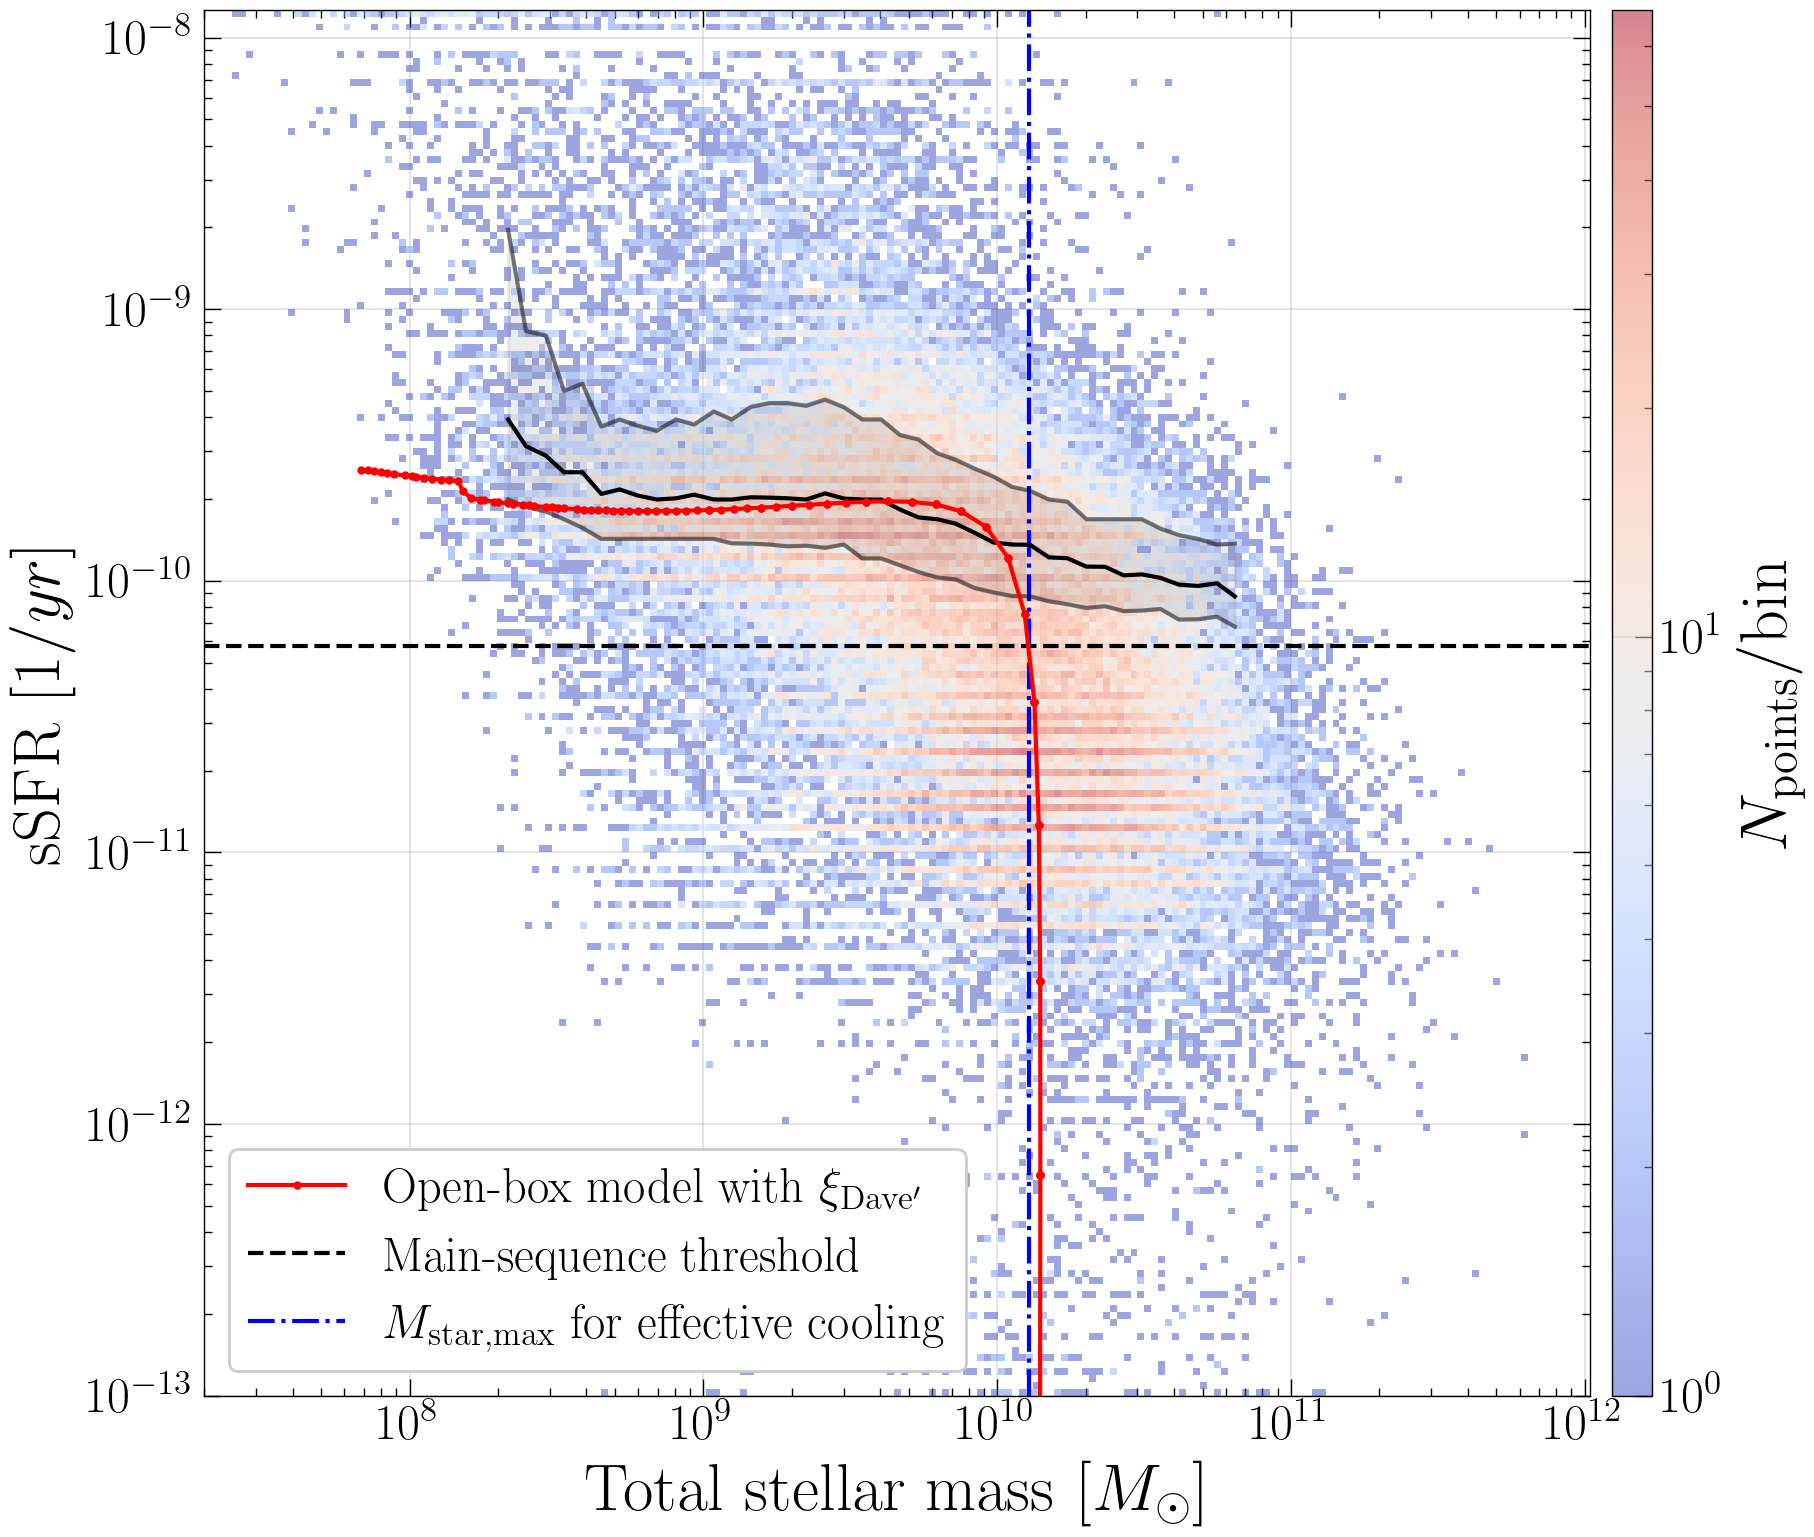

In [43]:
x_data = results['best.stellar.m_star']
y_data = results['best.sfh.sfr10Myrs']/results['best.stellar.m_star']

t_form = np.logspace(np.log10(0.1), np.log10(1), 100)
    
fig, ax, statistics, hist = Plot(x_data, y_data, 'Total stellar mass $[M_\odot]$', 'sSFR $[1/yr]$', MS_mask, 
                                 x_min=2e7, y_min=1e-13, x_min_bins=2e8, x_max_bins=7e10)

M_s_array, sSFR_array = plot_sSFR(evolve_galaxy_davexi, time_z_mean, t_form, M_h_form)
ax.plot(M_s_array, 5.5*sSFR_array, marker='.', markersize=4, color='red', zorder=2, label='Open-box model with $\\xi_{\\rm Dave\'}$')

ax.axhline(sSFR_threshold, ls='--', lw=1.5, c='black', zorder=1, label='Main-sequence threshold')
ax.axvline(m_star_max, ls='-.', lw=1.5, c='blue', zorder=1, label='$M_{\\rm star, max}$ for effective cooling')
ax.legend(loc='lower left');

# 5) Open-box at equilibrium model + closed-box model

## 5.1) Federico's approach

$M_{\rm gas}(t) = M_{\rm gas}(t_0) \exp\left(-\frac{\epsilon}{t_\text{\rm dyn}} (1 - R) \Delta t \right)$

$\Delta t = \dfrac{M_{\rm halo}(t) - M_{\rm halo}(t_0)}{\dot{M}_{\rm halo}^{\rm in}} = \dfrac{F^{-1}(M_{\rm star}(t)) - F^{-1}(M_{\rm star}(t_0))}{\dot{M}_{\rm halo}^{\rm in}}$
 
$sSFR(t) = \dfrac{\epsilon}{t_\text{dyn}} \dfrac{M_{\rm gas}(t)}{M_{\rm star}(t)}$

In [44]:
def Delta_t_from_eq(m_star, m_star_0, z):
    num = 10 ** leg.__call__(np.log10(m_star)) - 10 ** leg.__call__(np.log10(m_star_0))
    return num / m_dot_in(10 ** leg.__call__(np.log10(m_star)), z)

def sSFR_closedbox(m_star, m_gas_0, m_star_0, z, R, epsilon, tdyn):
    factor = (epsilon / tdyn) * (1 - R)
    m_gas = m_gas_0 * np.exp(-factor * Delta_t_from_eq(m_star, m_star_0, z))
    return (epsilon / tdyn) * m_gas / m_star

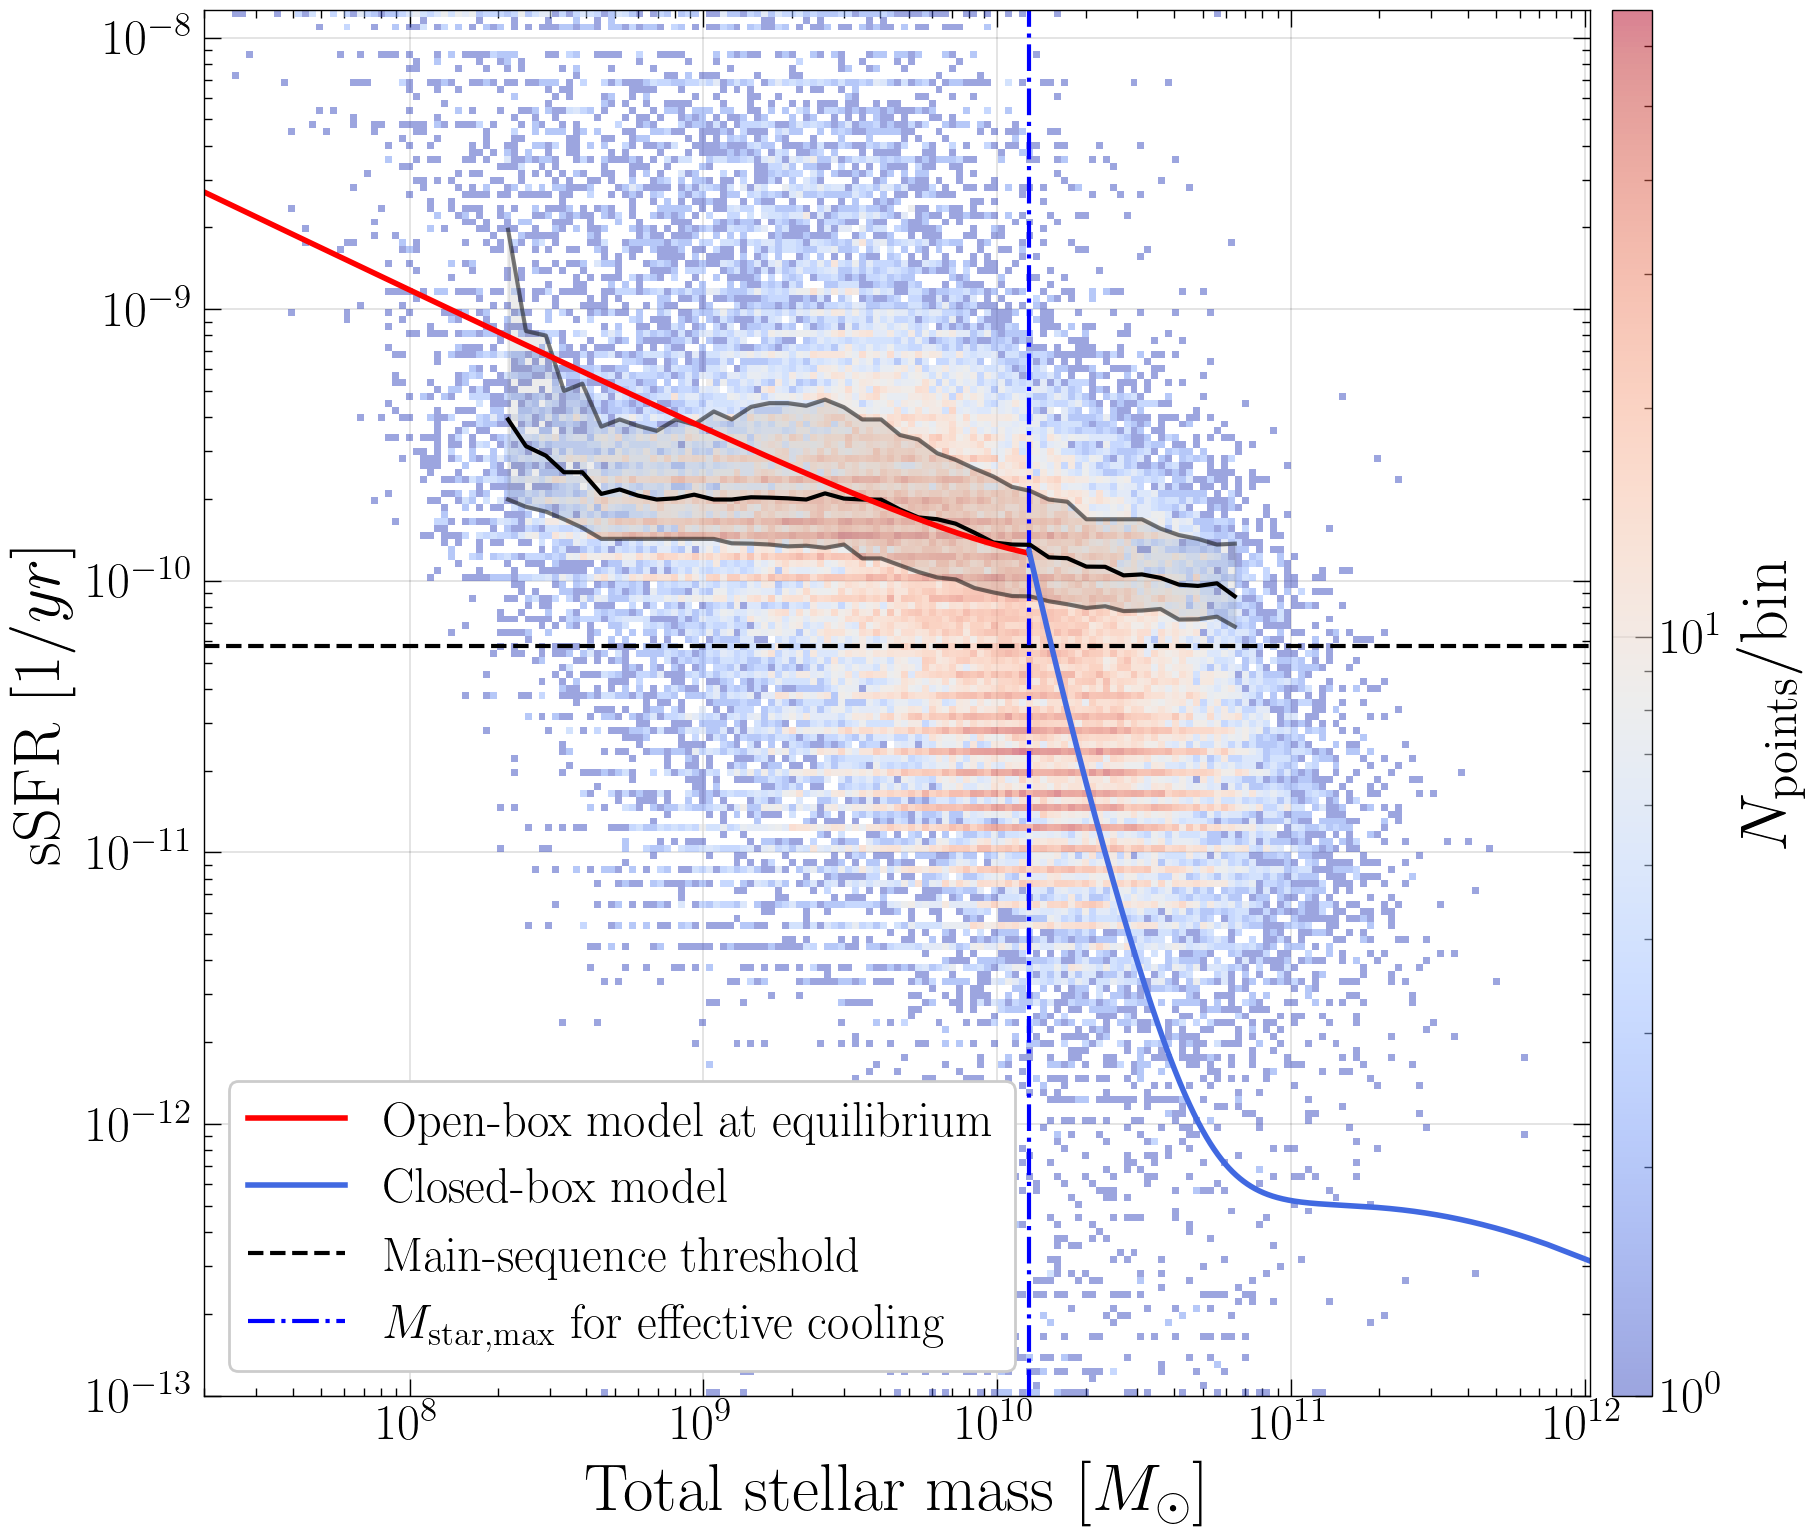

In [45]:
x_data = results['best.stellar.m_star']
y_data = results['best.sfh.sfr10Myrs']/results['best.stellar.m_star']
    
fig, ax, statistics, hist = Plot(x_data, y_data, 'Total stellar mass $[M_\odot]$', 'sSFR $[1/yr]$', MS_mask, 
                                 x_min=2e7, y_min=1e-13, x_min_bins=2e8, x_max_bins=7e10)

x_data = np.sort(np.array(results['best.stellar.m_star']))
x_plot = x_data[np.logical_and((m_star_min<=x_data), (x_data<=m_star_max))]
sSFRvsmass = sSFR_openbox_eq(x_plot, fb=0.15, eta=0.9, R=0.4, z=z_mean)
ax.plot(x_plot, sSFRvsmass, lw=2, color='red', zorder=2, label='Open-box model at equilibrium')

x_plot = x_data[x_data>m_star_max]
sSFRvsmass = sSFR_closedbox(x_plot, m_gas_0=10**9.65, m_star_0=m_star_m_halo(10**11.6, z=z_mean), z=z_mean, 
                            R=0.4, epsilon=0.01, tdyn=2.7e7)
ax.plot(x_plot, sSFRvsmass, lw=2, color='royalblue', zorder=2, label='Closed-box model')

ax.axhline(sSFR_threshold, ls='--', lw=1.5, c='black', zorder=1, label='Main-sequence threshold')
ax.axvline(m_star_max, ls='-.', lw=1.5, c='blue', zorder=1, label='$M_{\\rm star, max}$ for effective cooling')
ax.legend(loc='lower left');

## 5.2) Marco's approach

(Voglio mettere nel report una formula che so ricavare, anche se magari è sbagliata. Il risultato finale è simile)

$$SFR(t) \, =  \epsilon \, M_{\rm gas}^\alpha (t) \, \overset{\mathrm{{Kennicut}}}{=} \, \dfrac{\epsilon}{\tau_{\rm dyn}} M_{\rm gas}(t) \, \doteq \; \epsilon' \, M_{\rm gas}(t)$$
 
$$\dfrac{dM_{\rm gas}(t)}{dt} \, = \, \dot{M}_{\rm gas}^{\rm in}(t) - \dot{M}_{\rm gas}^{\rm out}(t) - (1-R)SFR(t) \, \overset{\color{red}{\mathrm{closed-box}}}{=} \, -(1-R)SFR(t) \, = \, -(1-R)\epsilon' M_{\rm gas}(t) \:\: \overset{\mathrm{if \, \epsilon(t) = \epsilon}}{\Longrightarrow }\:\: \color{lime}{M_{\rm gas}(t) \, = \, M_{\rm gas}(t_0)\exp{[-(1-R)\epsilon' (t-t_0)]}}$$

$$M_{\rm star}(t) - M_{\rm star}(t_0) \, = \, (1-R) \int_{t_0}^t SFR(t')dt' \:\: \Longrightarrow \:\: \color{lime}{M_{\rm star}(t) \, = \, M_{\rm star}(t_0) + M_{\rm gas}(t_0)\{1-\exp{[-(1-R)\epsilon' (t-t_0)]}\}}$$

$$\exp{[-(1-R)\epsilon' (t-t_0)]} \, = \, 1 - \dfrac{M_{\rm star}(t) - M_{\rm star}(t_0)}{M_{\rm gas}(t_0)}$$

$$SFR(t) \, =  \, \epsilon' M_{\rm gas}(t_0)\exp{[-(1-R)\epsilon' (t-t_0)]} \, = \, \, \epsilon' \left[M_{\rm gas}(t_0) - M_{\rm star}(t) + M_{\rm star}(t_0)\right]$$

$$\color{lime}{sSFR(t) \, = \, \epsilon' \left(\dfrac{M_{\rm gas}(t_0) + M_{\rm star}(t_0)}{M_{\rm star}(t)} - 1 \right)} $$

In [46]:
def sSFR_closedbox(m_star, m_gas_0, epsilon, tdyn):
    epsilon_primed = (epsilon / tdyn)
    return -epsilon_primed + epsilon_primed*(m_gas_0 + m_star_max)/m_star

We choose $M_{\rm gas}(t_0)$ such that the closed-box model matches the open-box model at $M_{\rm star} = M_{\rm star, max}$

In [47]:
m_gas_0 = m_star_max/8

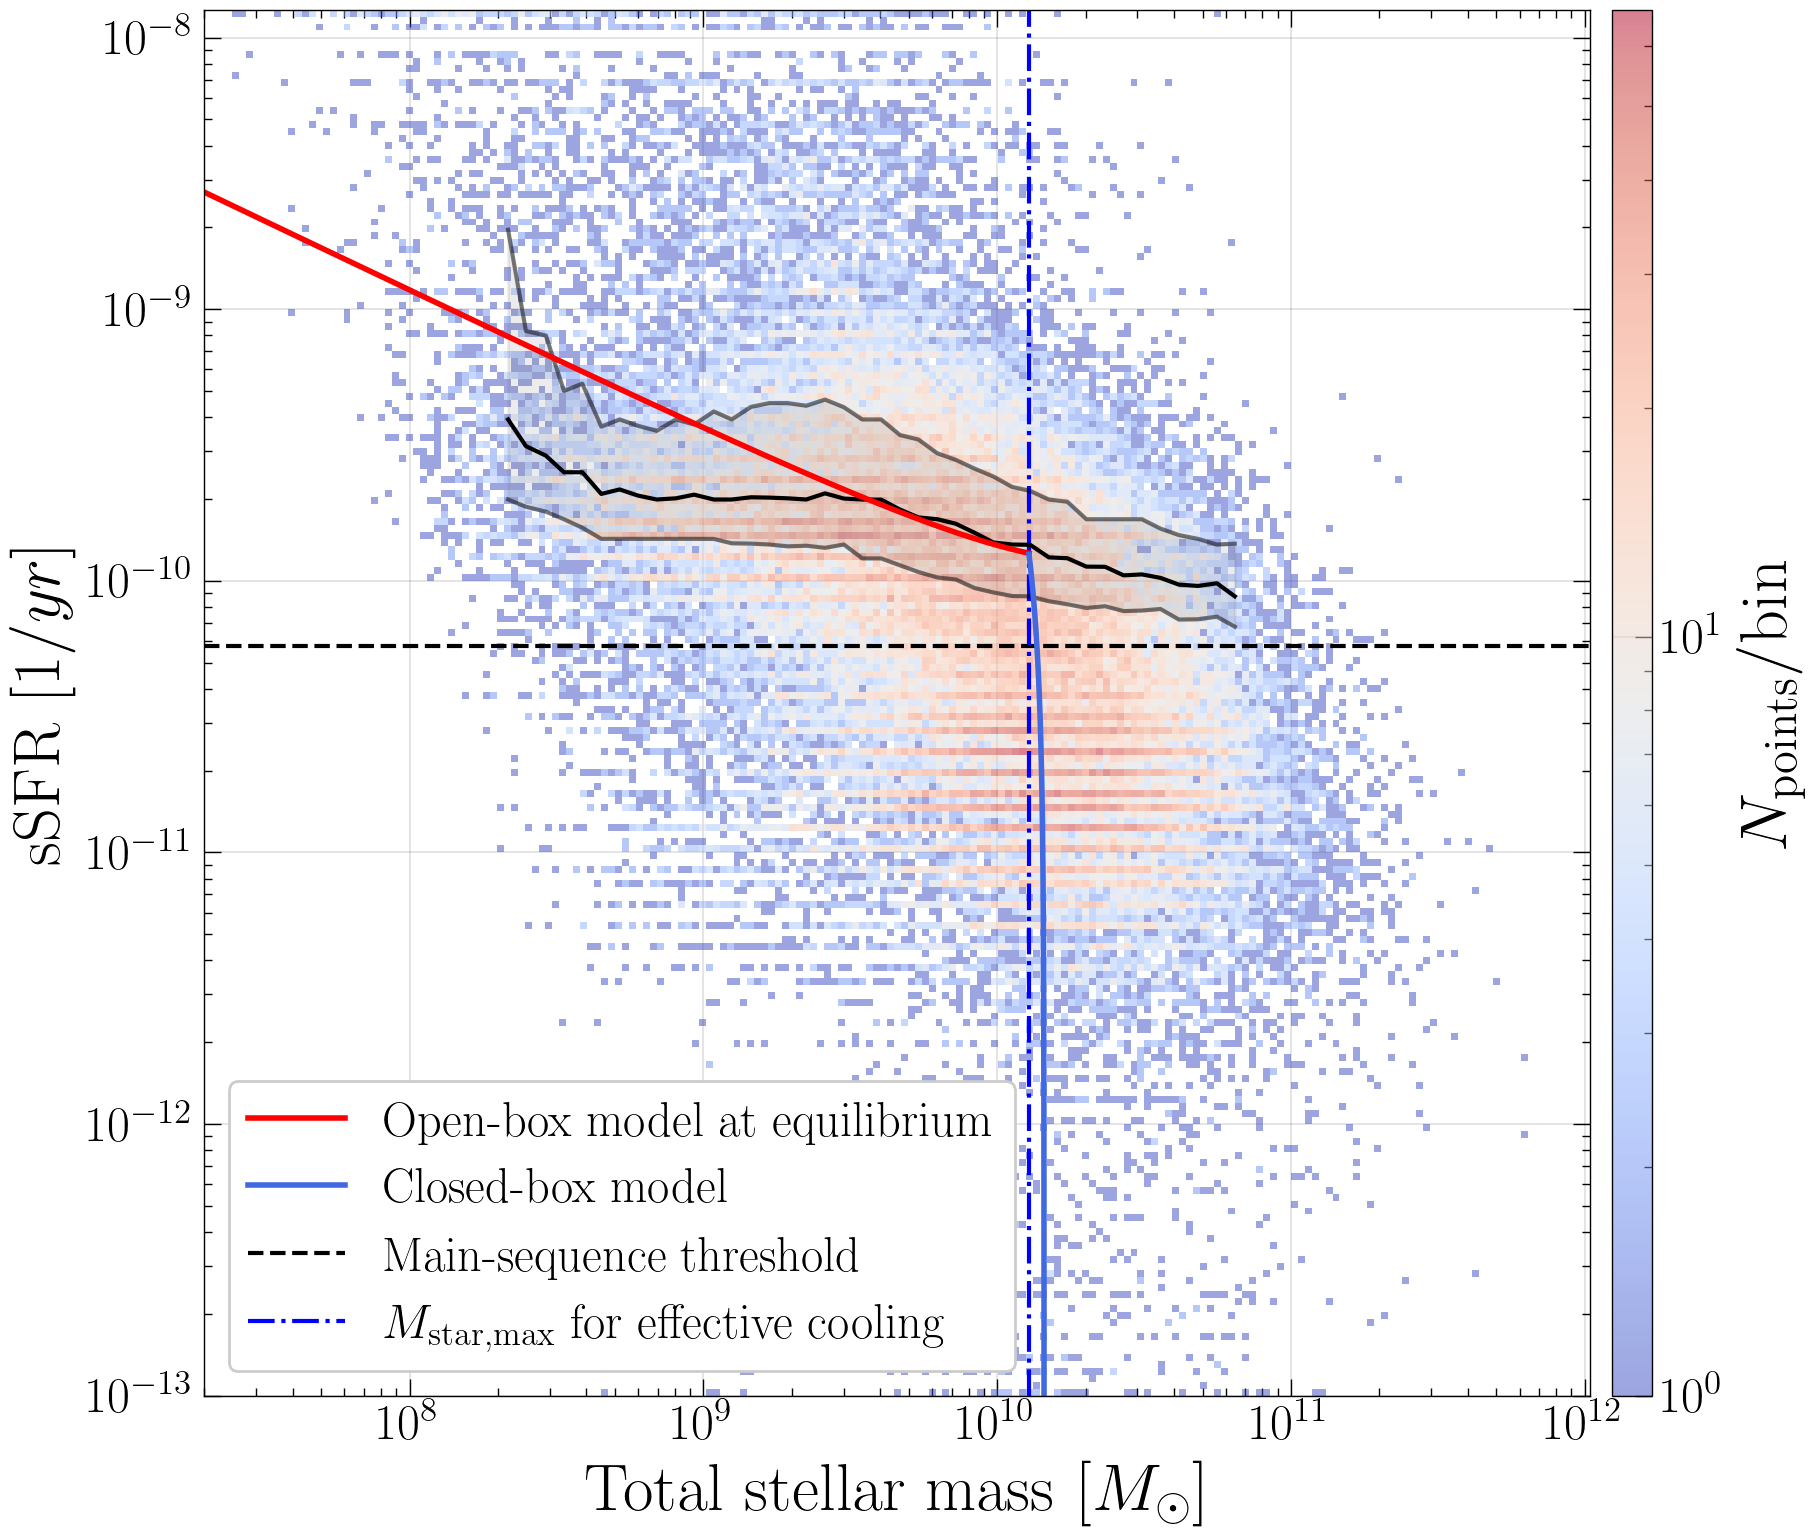

In [48]:
x_data = results['best.stellar.m_star']
y_data = results['best.sfh.sfr10Myrs']/results['best.stellar.m_star']
    
fig, ax, statistics, hist = Plot(x_data, y_data, 'Total stellar mass $[M_\odot]$', 'sSFR $[1/yr]$', MS_mask, 
                                 x_min=2e7, y_min=1e-13, x_min_bins=2e8, x_max_bins=7e10)

x_data = np.sort(np.array(results['best.stellar.m_star']))
x_plot = x_data[np.logical_and((m_star_min<=x_data), (x_data<=m_star_max))]
sSFRvsmass = sSFR_openbox_eq(x_plot, fb=0.15, eta=0.9, R=0.4, z=z_mean)
ax.plot(x_plot, sSFRvsmass, lw=2, color='red', zorder=2, label='Open-box model at equilibrium')

x_plot = x_data[x_data>m_star_max]
sSFRvsmass = sSFR_closedbox(x_plot, m_gas_0=m_gas_0, epsilon=0.02, tdyn=2.e7)
ax.plot(x_plot, sSFRvsmass, lw=2, color='royalblue', zorder=2, label='Closed-box model')

ax.axhline(sSFR_threshold, ls='--', lw=1.5, c='black', zorder=1, label='Main-sequence threshold')
ax.axvline(m_star_max, ls='-.', lw=1.5, c='blue', zorder=1, label='$M_{\\rm star, max}$ for effective cooling')
ax.legend(loc='lower left');

Let's see if the assumption $M_{\rm gas}(t_0) = M_{\rm star, max}/8$ makes sense

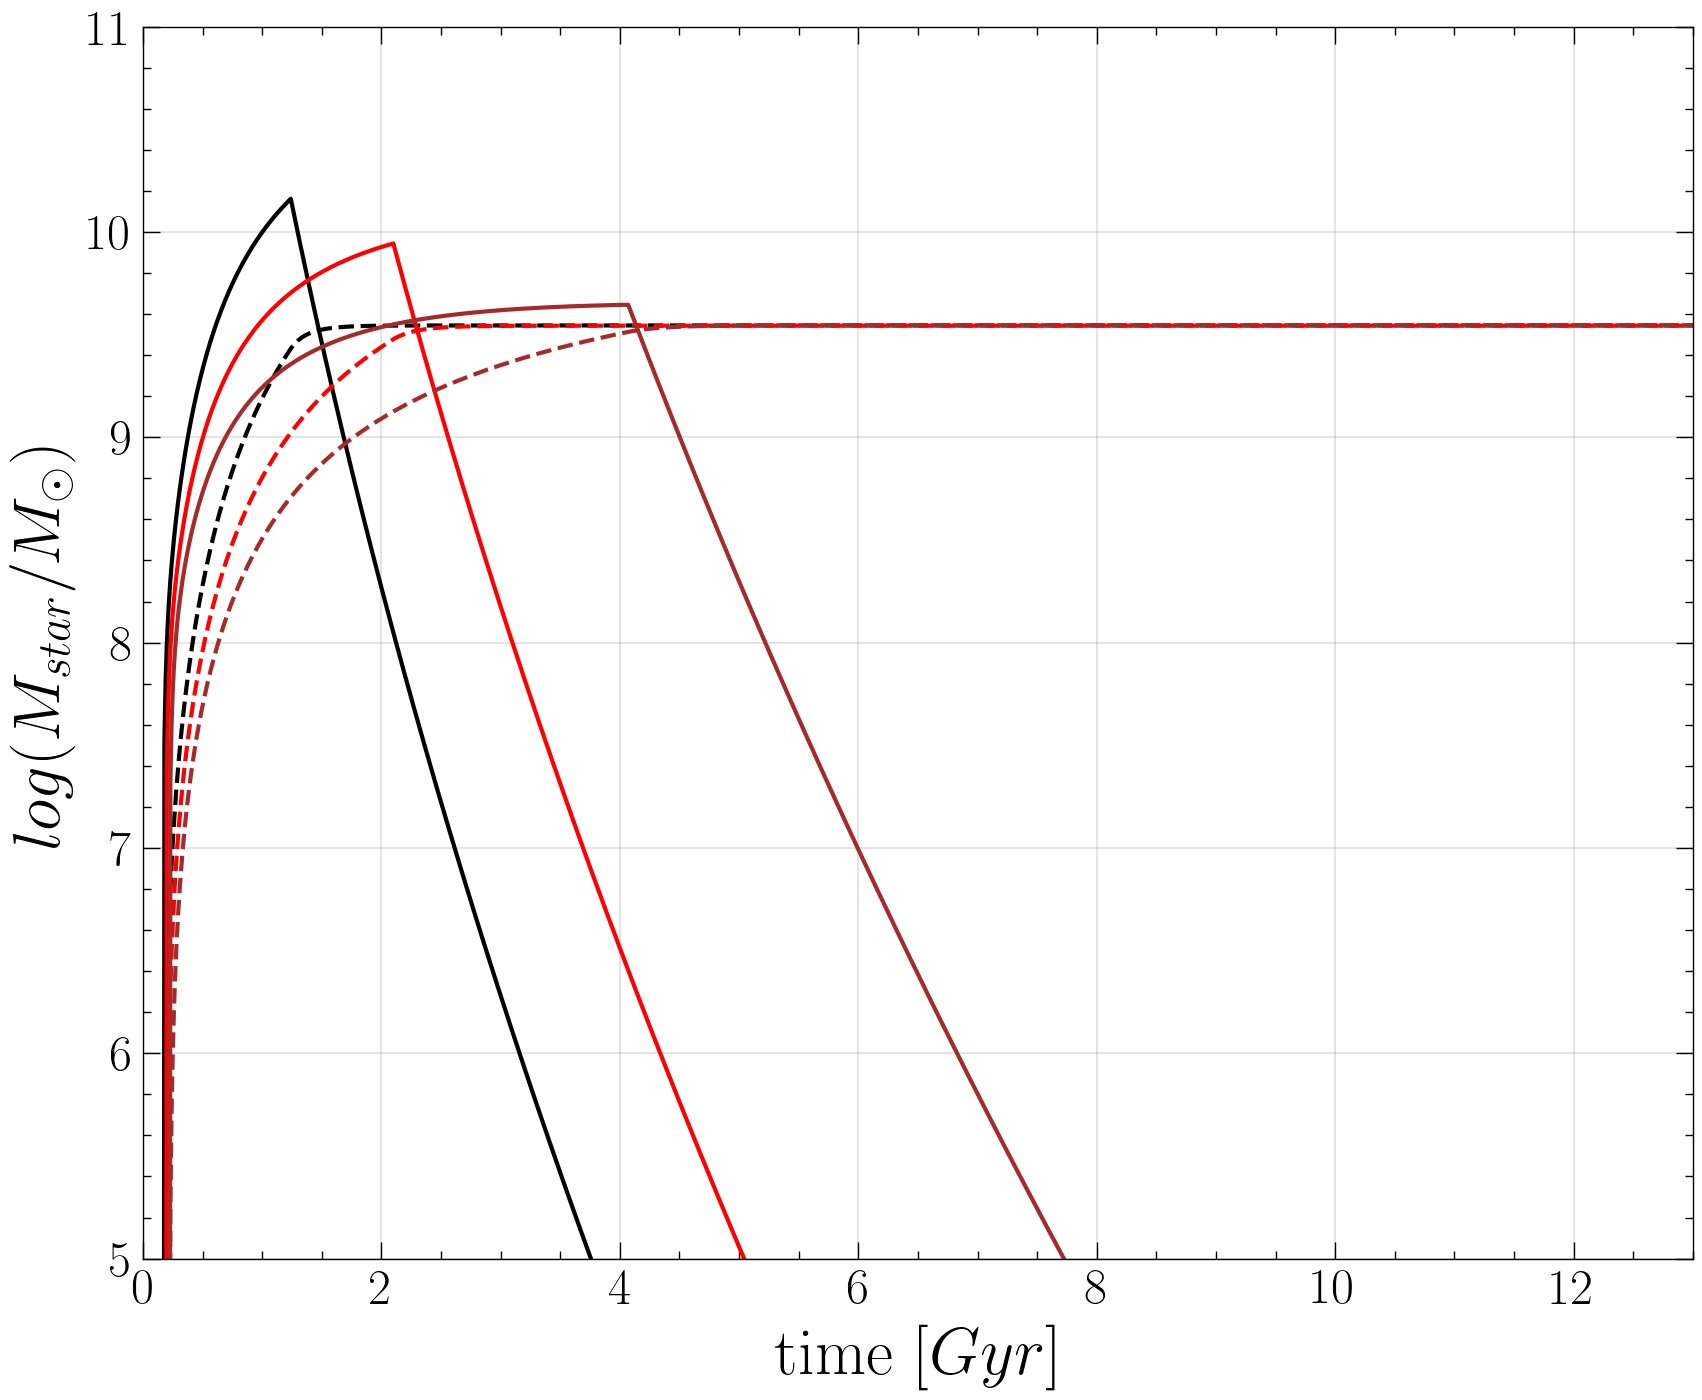

In [49]:
for i in range(len(t_form_plot[:3])):
    M_h, M_g, M_s, SFR = evolve_galaxy_stepxi(t_form=t_form_plot[i], t_obs=13, M_h_in=M_h_form)
    plt.plot(t, np.log10(np.where(M_g>0, M_g, 1.0)), color=col_plot[i])
    plt.plot(t, np.log10(np.where(M_s>0, M_s/8, 1.0)), color=col_plot[i], ls='--')

plt.xlim(0, 13)
plt.ylim(5, 11)
plt.xlabel('time $[Gyr]$')
plt.ylabel('$log(M_{star}/M_\\odot)$');